**Enrique Santos Fraire, 14/09/2022**

# **Introducción**

A través de los estados financieros trimestrales históricos de todas las empresas públicas estadounidenses que cotizan en la Bolsa de Nueva York y NASDAQ, se realizó un análisis descriptivo de los datos con el fin de implementar posibles alternativas de modelos de predicción.

Por medio de este Jupyter Notebook se podrá ver todo el proceso de desarrollo del proyecto, desde la carga de datos hasta la creación e interpretación del modelo.

# **CARGA Y LIMPIEZA DE DATOS**

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [3]:
%cd "/content/gdrive/MyDrive/Semestre IA/Estadística para la ciencia de datos"
!ls  # show current directory

/content/gdrive/MyDrive/Semestre IA/Estadística para la ciencia de datos
' Business case: Understanding profitability in the US financial market.ipynb'
 us2022q2a.csv
 usfirms2022.csv
'Workshop 1, Advanced AI - Statistics Module.ipynb'
'Workshop 2, Advanced AI - Statistics Module.ipynb'
'Workshop 3, Advanced AI - Statistics Module.ipynb'


IMPORTACIÓN DE LIBRERÍAS

In [29]:
import pandas as pd
import plotly.express as px

df1 = pd.read_csv('us2022q2a.csv')
df2 = pd.read_csv('usfirms2022.csv')
usdata = df1.copy()

DATAFRAME DE PRUEBA PARA PROBAR EL MULTI-INDEX POR Q Y POR FIRM.

SE OBTIENE EL PRECIO DEL AÑO PASADO COMO LPRICE.

In [30]:
usdata['qdate'] = pd.PeriodIndex(usdata['q'], freq="Q")

usdata.set_index(['firm', 'qdate'], inplace = True)

usdata.index
usdata.columns
usdata['lprice'] = usdata.groupby(['firm'])['adjprice'].shift(4)

In [31]:
usdata[['q', 'adjprice', 'lprice']]
#usdata.loc['ADT': 'ADTN', ['adjprice', 'lprice']].iloc[84:98,]

q   adjprice    lprice
firm qdate                              
A    2000Q1  2000q1  63.761670       NaN
     2000Q2  2000q2  45.215607       NaN
     2000Q3  2000q3  30.003238       NaN
     2000Q4  2000q4  33.566841       NaN
     2001Q1  2001q1  18.840347  63.76167
...             ...        ...       ...
ZYNE 2021Q3  2021q3   4.240000   3.31000
     2021Q4  2021q4   2.880000   3.30000
     2022Q1  2022q1   2.050000   4.65000
     2022Q2  2022q2   1.140000   5.29000
NaN  NaN        NaN        NaN       NaN

[324447 rows x 3 columns]

SE OBTIENEN LOS RETORNOS DE 2 FORMAS DIFERENTES, CON CÁLCULOS Y CON LA COLUMNA LPRICE.

In [32]:
import numpy as np
usdata['r'] = np.log(usdata['adjprice']) - np.log(usdata['lprice'])
usdata['r2']= np.log(usdata['adjprice']) - np.log(usdata.groupby(['firm'])['adjprice'].shift(4))

In [33]:
usdata[['q', 'adjprice', 'lprice', 'r', 'r2']]
#usdata.loc['ADT': 'ADTN', ['adjprice', 'lprice', 'r', 'r2']].iloc[85:96,]

q   adjprice    lprice         r        r2
firm qdate                                                  
A    2000Q1  2000q1  63.761670       NaN       NaN       NaN
     2000Q2  2000q2  45.215607       NaN       NaN       NaN
     2000Q3  2000q3  30.003238       NaN       NaN       NaN
     2000Q4  2000q4  33.566841       NaN       NaN       NaN
     2001Q1  2001q1  18.840347  63.76167 -1.219152 -1.219152
...             ...        ...       ...       ...       ...
ZYNE 2021Q3  2021q3   4.240000   3.31000  0.247615  0.247615
     2021Q4  2021q4   2.880000   3.30000 -0.136132 -0.136132
     2022Q1  2022q1   2.050000   4.65000 -0.819027 -0.819027
     2022Q2  2022q2   1.140000   5.29000 -1.534790 -1.534790
NaN  NaN        NaN        NaN       NaN       NaN       NaN

[324447 rows x 5 columns]

In [34]:
df1.head()

firm       q    revenue       cogs       sgae  otheropexp  extraincome  \
0    A  2000q1        NaN        NaN        NaN         NaN          NaN   
1    A  2000q2  2485000.0  1261000.0  1010000.0         0.0      42000.0   
2    A  2000q3  2670000.0  1369000.0  1091000.0         0.0      28000.0   
3    A  2000q4  3372000.0  1732000.0  1182000.0         0.0      10000.0   
4    A  2001q1  2841000.0  1449000.0  1113000.0         0.0      -6000.0   

   finexp  incometax  totalassets  totalliabilities  shortdebt  longdebt  \
0     NaN        NaN          NaN               NaN        NaN       NaN   
1     0.0    90000.0    7321000.0         2679000.0   512000.0       0.0   
2     0.0    83000.0    7827000.0         2925000.0   528000.0       0.0   
3     0.0   163000.0    8425000.0         3160000.0   830000.0       0.0   
4     0.0   119000.0    9208000.0         3667000.0   556000.0       0.0   

   stockholderequity   adjprice  originalprice  sharesoutstanding  \
0                NaN  63.761670       104.0000         452000.000   
1          4642000.0  45.215607        73.7500         452271.967   
2          4902000.0  30.003238        48.9375         453014.579   
3          5265000.0  33.566841        54.7500         456366.381   
4          5541000.0  18.840347        30.7300         456769.737   

   fiscalmonth    year  cto  
0          NaN  2000.0  1.0  
1          6.0  2000.0  2.0  
2          9.0  2000.0  3.0  
3         12.0  2000.0  4.0  
4          3.0  2001.0  1.0

In [35]:
df2.head()

Ticker                   Name  N  Class Country\nof Origin Type of Asset  \
0   FLWS  1 800 Flowers Com Inc  1  Com A                 US         Stock   
1    TXG      10x Genomics, Inc  2  Com A                 US         Stock   
2   GOED      1847 Goedeker Inc  3    Com                 US         Stock   
3   ONEM  1life Healthcare, Inc  4    Com                 US         Stock   
4   SRCE        1st Source Corp  5    Com                 US         Stock   

               Sector NAICS\nlevel 1 Exchange / Src    Sector\nEconomatica  \
0                       Retail Trade         NASDAQ                  Trade   
1                      Manufacturing         NASDAQ      Electric Electron   
2                       Retail Trade           AMEX                  Trade   
3  Health Care and Social Assistance         NASDAQ                  Other   
4              Finance and Insurance         NASDAQ  Finance and Insurance   

                        Sector NAICS\nlast available partind  
0                                       Retail Trade       -  
1  Navigational, Measuring, Electromedical, and C...       -  
2              Furniture and Home Furnishings Stores       -  
3                              Offices of Physicians       -  
4                   Depository Credit Intermediation       -

DROPEAMOS LOS DATOS QUE NO APORTAN INFORMACIÓN AL MODELO, FISCALMONTH, YEAR Y CTO YA ESTAN EN Q. COUNTRY OF ORIGIN Y ASSET ES INFORMACIÓN QUE NO CAMBIA.

In [36]:
df1 = df1.drop(['fiscalmonth', 'year', 'cto'], axis=1)
df2 = df2.drop(['N', 'Country\nof Origin', 'Type of Asset'], axis=1)

UNIMOS AMBOS DATA FRAMES.

In [37]:
df_merge = df1.merge(df2, left_on='firm', right_on='Ticker')
df_merge

firm       q    revenue       cogs          sgae  otheropexp  \
0          A  2000q1        NaN        NaN           NaN         NaN   
1          A  2000q2  2485000.0  1261000.0  1.010000e+06         0.0   
2          A  2000q3  2670000.0  1369000.0  1.091000e+06         0.0   
3          A  2000q4  3372000.0  1732000.0  1.182000e+06         0.0   
4          A  2001q1  2841000.0  1449000.0  1.113000e+06         0.0   
...      ...     ...        ...        ...           ...         ...   
323811  ZYNE  2021q2        0.0        0.0  9.838494e+03         0.0   
323812  ZYNE  2021q3        0.0        0.0  1.021065e+04         0.0   
323813  ZYNE  2021q4        0.0        0.0  8.836436e+03         0.0   
323814  ZYNE  2022q1        0.0        0.0  8.903915e+03         0.0   
323815  ZYNE  2022q2        0.0        0.0  9.168770e+03         0.0   

         extraincome  finexp  incometax  totalassets  ...  originalprice  \
0                NaN     NaN        NaN          NaN  ...       104.0000   
1       42000.000000   0.000    90000.0  7321000.000  ...        73.7500   
2       28000.000000   0.000    83000.0  7827000.000  ...        48.9375   
3       10000.000000   0.000   163000.0  8425000.000  ...        54.7500   
4       -6000.000000   0.000   119000.0  9208000.000  ...        30.7300   
...              ...     ...        ...          ...  ...            ...   
323811   -117.528220  -5.943        0.0    98195.904  ...         5.2900   
323812   -376.636750  -5.038        0.0    89996.170  ...         4.2400   
323813     16.937906  -4.433        0.0    81171.507  ...         2.8800   
323814    317.252110 -96.044        0.0    74381.029  ...         2.0500   
323815   -775.927860 -91.691        0.0    67006.959  ...         1.1400   

        sharesoutstanding  Ticker                          Name  Class  \
0              452000.000       A     Agilent Technologies, Inc    Com   
1              452271.967       A     Agilent Technologies, Inc    Com   
2              453014.579       A     Agilent Technologies, Inc    Com   
3              456366.381       A     Agilent Technologies, Inc    Com   
4              456769.737       A     Agilent Technologies, Inc    Com   
...                   ...     ...                           ...    ...   
323811          41251.537    ZYNE  Zynerba Pharmaceuticals, Inc    Com   
323812          41251.537    ZYNE  Zynerba Pharmaceuticals, Inc    Com   
323813          41217.537    ZYNE  Zynerba Pharmaceuticals, Inc    Com   
323814          42447.037    ZYNE  Zynerba Pharmaceuticals, Inc    Com   
323815          43595.959    ZYNE  Zynerba Pharmaceuticals, Inc    Com   

        Sector NAICS\nlevel 1  Exchange / Src Sector\nEconomatica  \
0               Manufacturing            NYSE   Electric Electron   
1               Manufacturing            NYSE   Electric Electron   
2               Manufacturing            NYSE   Electric Electron   
3               Manufacturing            NYSE   Electric Electron   
4               Manufacturing            NYSE   Electric Electron   
...                       ...             ...                 ...   
323811          Manufacturing          NASDAQ            Chemical   
323812          Manufacturing          NASDAQ            Chemical   
323813          Manufacturing          NASDAQ            Chemical   
323814          Manufacturing          NASDAQ            Chemical   
323815          Manufacturing          NASDAQ            Chemical   

                             Sector NAICS\nlast available partind  
0       Navigational, Measuring, Electromedical, and C...   0.124  
1       Navigational, Measuring, Electromedical, and C...   0.124  
2       Navigational, Measuring, Electromedical, and C...   0.124  
3       Navigational, Measuring, Electromedical, and C...   0.124  
4       Navigational, Measuring, Electromedical, and C...   0.124  
...                                                   ...     ...  
323811          Pharmaceutical and M

ASIGNAMOS EN MULTI-INDEX

In [38]:
df_merge['qdate'] = pd.PeriodIndex(df_merge['q'], freq="Q")

df_merge.set_index(['firm', 'qdate'], inplace = True)

OBTENEMOS EL ÚLTIMO PRECIO ANUAL Y LOS RETORNOS COMPUESTOS

In [39]:
df_merge['lprice'] = df_merge.groupby(['firm'])['adjprice'].shift(4)
df_merge['r'] = np.log(df_merge['adjprice']) - np.log(df_merge['lprice'])
df_merge['r2']= np.log(df_merge['adjprice']) - np.log(df_merge.groupby(['firm'])['adjprice'].shift(4))
df_merge.head(10)

q    revenue       cogs       sgae  otheropexp  extraincome  \
firm qdate                                                                      
A    2000Q1  2000q1        NaN        NaN        NaN         NaN          NaN   
     2000Q2  2000q2  2485000.0  1261000.0  1010000.0         0.0      42000.0   
     2000Q3  2000q3  2670000.0  1369000.0  1091000.0         0.0      28000.0   
     2000Q4  2000q4  3372000.0  1732000.0  1182000.0         0.0      10000.0   
     2001Q1  2001q1  2841000.0  1449000.0  1113000.0         0.0      -6000.0   
     2001Q2  2001q2  2382000.0  1406000.0  1038000.0         0.0     273000.0   
     2001Q3  2001q3  1806000.0  1146000.0  1002000.0         0.0      30000.0   
     2001Q4  2001q4  1660000.0  1337000.0   981000.0         0.0     588000.0   
     2002Q1  2002q1  1426000.0   878000.0   990000.0         0.0      21000.0   
     2002Q2  2002q2  1457000.0   854000.0   952000.0         0.0      16000.0   

             finexp  incometax  totalassets  totalliabilities  ...  \
firm qdate                                                     ...   
A    2000Q1     NaN        NaN          NaN               NaN  ...   
     2000Q2     0.0    90000.0    7321000.0         2679000.0  ...   
     2000Q3     0.0    83000.0    7827000.0         2925000.0  ...   
     2000Q4     0.0   163000.0    8425000.0         3160000.0  ...   
     2001Q1     0.0   119000.0    9208000.0         3667000.0  ...   
     2001Q2     0.0   115000.0    9080000.0         3464000.0  ...   
     2001Q3     0.0   -93000.0    8622000.0         3135000.0  ...   
     2001Q4     0.0  -213000.0    7986000.0         2327000.0  ...   
     2002Q1     0.0  -106000.0    8558000.0         3163000.0  ...   
     2002Q2     0.0   -80000.0    8238000.0         3110000.0  ...   

                                  Name  Class  Sector NAICS\nlevel 1  \
firm qdate                                                             
A    2000Q1  Agilent Technologies, Inc    Com          Manufacturing   
     2000Q2  Agilent Technologies, Inc    Com          Manufacturing   
     2000Q3  Agilent Technologies, Inc    Com          Manufacturing   
     2000Q4  Agilent Technologies, Inc    Com          Manufacturing   
     2001Q1  Agilent Technologies, Inc    Com          Manufacturing   
     2001Q2  Agilent Technologies, Inc    Com          Manufacturing   
     2001Q3  Agilent Technologies, Inc    Com          Manufacturing   
     2001Q4  Agilent Technologies, Inc    Com          Manufacturing   
     2002Q1  Agilent Technologies, Inc    Com          Manufacturing   
     2002Q2  Agilent Technologies, Inc    Com          Manufacturing   

             Exchange / Src  Sector\nEconomatica  \
firm qdate                                         
A    2000Q1            NYSE    Electric Electron   
     2000Q2            NYSE    Electric Electron   
     2000Q3            NYSE    Electric Electron   
     2000Q4            NYSE    Electric Electron   
     2001Q1            NYSE    Electric Electron   
     2001Q2            NYSE    Electric Electron   
     2001Q3            NYSE    Electric Electron   
     2001Q4            NYSE    Electric Electron   
     2002Q1            NYSE    Electric Electron   
     2002Q2            NYSE    Electric Electron   

                                  Sector NAICS\nlast available partind  \
firm qdate                                                               
A    2000Q1  Navigational, Measuring, Electromedical, and C...   0.124   
     2000Q2  Navigational, Measuring, Electromedical, and C...   0.124   
     2000Q3  Navigational, Measuring, Electromedical, and C...   0.124   
     2000Q4  Navigational, Measuring, Electromedical, and C...   0.124   
     2001Q1  Navigational, Measuring, Electromedical, and C...   0.124   
     2001Q2  Navigational, Measuring, Electromedical, and C...   0.124   
     2001Q3  Navigational, Measuring, Electromedical, and C...   0.124   
     2001Q4  Navigational, Measuring, Electromed

GUARDAMOS UN COPIA DEL DATAFRAME

In [40]:
df_copy = df_merge.copy()

# DATOS ESTADÍSTICOS

CAMBIAMOS LOS 0'S POR NAN'S EN LA COLUMNA REVENUE QUE SE UTILIZA COMO DENOMINADOR PARA CALCULAR EL OPM, DE LO CONTRARIO EL RESULTADO SERÁ INDEFINIDO.

In [62]:
df_copy['revenue'].replace(0, np.nan, inplace=True)

SE CREAN LAS COLUMNAS DE DATOS ESTADÍSTICOS QUE NOS AYUDARÁN A RESOLVER LOS PROBLEMAS.

In [64]:
# Firm Size Measures
df_copy['Book'] = df_copy['totalassets'] - df_copy['totalliabilities']
df_copy['Market'] = df_copy['originalprice'] * df_copy['sharesoutstanding']

# Profit Margin Measures
df_copy['EBIT'] = df_copy['revenue'] - df_copy['cogs'] - df_copy['sgae'] - df_copy['otheropexp']
df_copy['Net Income'] = df_copy['EBIT'] + df_copy['extraincome']- df_copy['incometax'] - df_copy['finexp']
df_copy['Earnings Per Share (EPS)'] = df_copy['Net Income'] / df_copy['sharesoutstanding']

# Se eligen los 3 márgenes para el análisis estadístico
df_copy['EPSP (deflated by price)'] = df_copy['Earnings Per Share (EPS)'] / df_copy['originalprice']

df_copy['Sales Anual Growth'] = (df_copy['revenue'] / (df_copy.groupby(['firm'])['revenue'].shift(4))) - 1
df_copy['Operating Profit Margin (OPM)'] = df_copy['EBIT'] / df_copy['revenue']
df_copy['Book-to-Market ratio'] = df_copy['Book'] / df_copy['Market']

In [66]:
# Visualización de datos estadísticos
df_copy[['Book', 'Market','EBIT','revenue','Net Income','Earnings Per Share (EPS)','EPSP (deflated by price)','Sales Anual Growth', 'Operating Profit Margin (OPM)', 'Book-to-Market ratio']].head(16)

Book        Market      EBIT    revenue  Net Income  \
firm qdate                                                              
A    2000Q1        NaN  4.700800e+07       NaN        NaN         NaN   
     2000Q2  4642000.0  3.335506e+07  214000.0  2485000.0    166000.0   
     2000Q3  4902000.0  2.216940e+07  210000.0  2670000.0    155000.0   
     2000Q4  5265000.0  2.498606e+07  458000.0  3372000.0    305000.0   
     2001Q1  5541000.0  1.403653e+07  279000.0  2841000.0    154000.0   
     2001Q2  5616000.0  1.485486e+07  -62000.0  2382000.0     96000.0   
     2001Q3  5487000.0  9.005459e+06 -342000.0  1806000.0   -219000.0   
     2001Q4  5659000.0  1.321995e+07 -658000.0  1660000.0    143000.0   
     2002Q1  5395000.0  1.621654e+07 -442000.0  1426000.0   -315000.0   
     2002Q2  5128000.0  1.097945e+07 -349000.0  1457000.0   -253000.0   
     2002Q3  5001000.0  6.095179e+06 -429000.0  1391000.0   -228000.0   
     2002Q4  4627000.0  8.387759e+06 -387000.0  1736000.0   -236000.0   
     2003Q1  4349000.0  6.196841e+06 -256000.0  1412000.0   -369000.0   
     2003Q2  4201000.0  9.213996e+06 -335000.0  1467000.0   -146000.0   
     2003Q3  2720000.0  1.051347e+07 -190000.0  1502000.0  -1556000.0   
     2003Q4  2824000.0  1.392260e+07   56000.0  1675000.0     13000.0   

             Earnings Per Share (EPS)  EPSP (deflated by price)  \
firm qdate                                                        
A    2000Q1                       NaN                       NaN   
     2000Q2                  0.367036                  0.004977   
     2000Q3                  0.342152                  0.006992   
     2000Q4                  0.668323                  0.012207   
     2001Q1                  0.337150                  0.010971   
     2001Q2                  0.210032                  0.006463   
     2001Q3                 -0.475428                 -0.024319   
     2001Q4                  0.308392                  0.010817   
     2002Q1                 -0.679084                 -0.019425   
     2002Q2                 -0.544968                 -0.023043   
     2002Q3                 -0.488530                 -0.037407   
     2002Q4                 -0.505327                 -0.028136   
     2003Q1                 -0.783036                 -0.059546   
     2003Q2                 -0.309779                 -0.015845   
     2003Q3                 -3.272292                 -0.148001   
     2003Q4                  0.027302                  0.000934   

             Sales Anual Growth  Operating Profit Margin (OPM)  \
firm qdate                                                       
A    2000Q1                 NaN                            NaN   
     2000Q2                 NaN                       0.086117   
     2000Q3                 NaN                       0.078652   
     2000Q4                 NaN                       0.135824   
     2001Q1                 NaN                       0.098205   
     2001Q2           -0.041449                      -0.026029   
     2001Q3           -0.323596                      -0.189369   
     2001Q4           -0.507711                      -0.396386   
     2002Q1           -0.498064                      -0.309958   
     2002Q2           -0.388329                      -0.239533   
     2002Q3           -0.229790                      -0.308411   
     2002Q4            0.045783                      -0.222926   
     2003Q1           -0.009818                      -0.181303   
     2003Q2            0.006863                      -0.228357   
     2003Q3            0.079799                      -0.126498   
     2003Q4           -0.035138                       0.033433   

             Book-to-Market ratio  
firm qdate                         
A    2000Q1                   NaN  
     2000Q2              0.139169  
     2000Q3              0.221116  
     2000Q4              0.210718  
     2001Q1              0.394756  
     2001Q2              0.378058  
     2001Q3        

# **Specific questions**

# 2.2.1.1 Considering the most recent financial quarter of the dataset

## Show how many firms by industry there are in the sample

SE CREA UNA MÁSCARA PARA FILTRAR ÚNICAMENTE LOS DATOS DEL ÚLTIMO TRIMESTRE

In [67]:
mask = df_copy['q'] == '2022q2'
last_quarter = df_copy[mask]

In [68]:
last_quarter

q     revenue       cogs          sgae  otheropexp  \
firm qdate                                                             
A    2022Q2  2022q2   1607000.0   746000.0  5.010000e+05         0.0   
AA   2022Q2  2022q2   3644000.0  2767000.0  2.200000e+05    -75000.0   
AAIC 2022Q2  2022q2     10900.0     6374.0  0.000000e+00         0.0   
AAL  2022Q2  2022q2  13422000.0        0.0  1.240500e+07         0.0   
AAME 2022Q2  2022q2     44669.0        0.0  4.678400e+04         0.0   
...             ...         ...        ...           ...         ...   
ZVIA 2022Q2  2022q2     45542.0    28168.0  2.407400e+04      8043.0   
ZVO  2022Q2  2022q2     51380.0    34995.0  2.610800e+04     -8882.0   
ZWS  2022Q2  2022q2    284200.0   170400.0  6.000000e+04       300.0   
ZY   2022Q2  2022q2      2634.0     9732.0  5.863800e+04     40460.0   
ZYNE 2022Q2  2022q2         NaN        0.0  9.168770e+03         0.0   

             extraincome      finexp  incometax   totalassets  \
firm qdate                                                      
A    2022Q2  -7000.00000   20000.000    59000.0  1.045500e+07   
AA   2022Q2  81000.00000   30000.000   234000.0  1.570900e+07   
AAIC 2022Q2  -3417.00000       0.000      802.0  1.084755e+06   
AAL  2022Q2  25000.00000  439000.000   127000.0  6.796300e+07   
AAME 2022Q2      0.00000       0.000     -436.0  3.792740e+05   
...                  ...         ...        ...           ...   
ZVIA 2022Q2   3662.00000       0.000        9.0  1.127380e+05   
ZVO  2022Q2  -3824.00000       0.000        8.0  8.543300e+04   
ZWS  2022Q2   -600.00000    5200.000    11300.0  1.176300e+06   
ZY   2022Q2   -885.00000    9376.000       11.0  4.709680e+05   
ZYNE 2022Q2   -775.92786     -91.691        0.0  6.700696e+04   

             totalliabilities  ...        r2         Book        Market  \
firm qdate                     ...                                        
A    2022Q2      5.333000e+06  ... -0.213296  5122000.000  3.547756e+07   
AA   2022Q2      8.417000e+06  ...  0.217886  7292000.000  8.407171e+06   
AAIC 2022Q2      8.710570e+05  ... -0.222528   213698.000  1.138033e+05   
AAL  2022Q2      7.638500e+07  ... -0.514447 -8422000.000  8.235848e+06   
AAME 2022Q2      2.701730e+05  ... -0.475675   109101.000  5.446399e+04   
...                       ...  ...       ...          ...           ...   
ZVIA 2022Q2      2.553900e+04  ...       NaN    87199.000  1.888586e+05   
ZVO  2022Q2      7.882800e+04  ... -0.982014     6605.000  3.307650e+04   
ZWS  2022Q2      9.469000e+05  ...  0.093173   229400.000  3.431356e+06   
ZY   2022Q2      2.343450e+05  ... -3.482115   236623.000  1.268631e+05   
ZYNE 2022Q2      9.765086e+03  ... -1.534790    57241.873  4.969939e+04   

                  EBIT  Net Income  Earnings Per Share (EPS)  \
firm qdate                                                     
A    2022Q2   360000.0    274000.0                  0.917284   
AA   2022Q2   732000.0    549000.0                  2.976438   
AAIC 2022Q2     4526.0       307.0                  0.008767   
AAL  2022Q2  1017000.0    476000.0                  0.732855   
AAME 2022Q2    -2115.0     -1679.0                 -0.082310   
...                ...         ...                       ...   
ZVIA 2022Q2   -14743.0    -11090.0                 -0.165007   
ZVO  2022Q2     -841.0     -4673.0                 -0.137054   
ZWS  2022Q2    53500.0     36400.0                  0.288963   
ZY   2022Q2  -106196.0   -116468.0                 -1.129214   
ZYNE 2022Q2        NaN         NaN                       NaN   

            EPSP (deflated by price) Sales Anual Growth  \
firm qdate                                                
A    2022Q2                 0.007723           0.053770   
AA   2022Q2                 0.065301           0.286269   
AAIC 2022Q2                 0.002698           0.547197   
AAL  2022Q2                 0.057796           0.794865   
AAME 2022Q2                -0.030828          -0.131916   
...          

SE OBTIENE LA CANTIDAD DE FIRMAS QUE HAY POR INDUSTRIA.

In [69]:
firms_by_industry = df2['Sector NAICS\nlevel 1'].value_counts()
firms_by_industry

Manufacturing                                                               1567
Finance and Insurance                                                        703
Information                                                                  263
Retail Trade                                                                 152
Professional, Scientific, and Technical Services                             145
Administrative and Support and Waste Management and Remediation Services     133
Mining, Quarrying, and Oil and Gas Extraction                                104
Wholesale Trade                                                               79
Utilities                                                                     77
Transportation and Warehousing                                                69
Accommodation and Food Services                                               69
Real Estate and Rental and Leasing                                            68
Health Care and Social Assis

## For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

In [101]:
typical_firm = last_quarter.groupby('Sector NAICS\nlevel 1')['Book'].mean().to_frame()
typical_firm['Book Median'] = last_quarter.groupby('Sector NAICS\nlevel 1')['Book'].median()

typical_firm['Market Mean'] = last_quarter.groupby('Sector NAICS\nlevel 1')['Market'].mean()
typical_firm['Market Median'] = last_quarter.groupby('Sector NAICS\nlevel 1')['Market'].median()

typical_firm['EBIT sum'] = last_quarter.groupby('Sector NAICS\nlevel 1')['EBIT'].sum()
typical_firm['revenue sum'] = last_quarter.groupby('Sector NAICS\nlevel 1')['revenue'].sum()
typical_firm['OPM mean'] = typical_firm['EBIT sum'] / typical_firm['revenue sum']

typical_firm['OPM Median'] = last_quarter.groupby('Sector NAICS\nlevel 1')['Operating Profit Margin (OPM)'].median()

typical_firm['Firms'] = last_quarter['Sector NAICS\nlevel 1'].value_counts()

typical_firm.reset_index(inplace=True)
typical_firm

Sector NAICS\nlevel 1          Book  \
0                                                   -  5.704446e+06   
1                     Accommodation and Food Services  5.139213e+05   
2   Administrative and Support and Waste Managemen...  2.819477e+06   
3          Agriculture, Forestry, Fishing and Hunting  3.629560e+06   
4                 Arts, Entertainment, and Recreation  5.394410e+06   
5                                        Construction  2.535521e+06   
6                                Educational Services  8.931767e+05   
7                               Finance and Insurance  5.482677e+06   
8                   Health Care and Social Assistance  1.080145e+06   
9                                         Information  4.213150e+06   
10                                      Manufacturing  2.417298e+06   
11      Mining, Quarrying, and Oil and Gas Extraction  3.345942e+06   
12      Other Services (except Public Administration)  5.954443e+05   
13   Professional, Scientific, and Technical Services  3.566048e+06   
14                 Real Estate and Rental and Leasing  1.816059e+06   
15                                       Retail Trade  3.379848e+06   
16                     Transportation and Warehousing  3.536723e+06   
17                                          Utilities  7.148295e+06   
18                                    Wholesale Trade  1.529928e+06   

    Book Median   Market Mean  Market Median      EBIT sum   revenue sum  \
0   5704446.000  4.865183e+06   4.865183e+06  1.267100e+05  2.732860e+05   
1    243717.500  8.681070e+06   1.394617e+06  1.111095e+07  6.047732e+07   
2    566167.000  1.385569e+07   1.938284e+06  1.909772e+07  1.218045e+08   
3   1104345.000  8.046780e+06   1.264045e+06  3.251190e+06  2.197062e+07   
4     67242.769  1.278260e+07   2.504698e+06  4.404016e+06  3.333987e+07   
5    998146.500  3.857422e+06   1.745045e+06  9.855623e+06  6.709260e+07   
6    649699.000  1.302581e+06   1.524843e+06  1.861960e+05  3.567683e+06   
7   1049158.000  8.412277e+06   1.264517e+06  1.719907e+08  6.407515e+08   
8    451385.000  3.507730e+06   1.338427e+06 -1.511021e+06  5.087670e+07   
9    500953.500  1.918280e+07   2.586582e+06  5.166241e+07  3.232527e+08   
10   244642.000  1.040643e+07   5.911289e+05  2.707108e+08  1.782879e+09   
11   741145.000  6.783299e+06   1.042405e+06  4.407631e+07  1.190024e+08   
12   431667.000  2.136156e+06   8.540956e+05  5.635980e+05  5.104295e+06   
13   279188.000  1.723014e+07   9.419611e+05  3.066358e+07  1.645780e+08   
14   634398.000  3.625235e+06   8.819927e+05  7.586994e+06  5.155032e+07   
15   577426.500  1.998810e+07   1.444971e+06  4.110833e+07  7.570414e+08   
16  1288121.500  1.191248e+07   2.464494e+06  2.030547e+07  1.816330e+08   
17  2791950.000  1.588301e+07   6.040649e+06  1.545641e+07  1.167458e+08   
18   683900.000  4.871519e+06   1.424602e+06  1.045879e+07  3.338191e+08   

    OPM mean  OPM Median  Firms  
0   0.463653    0.463653      2  
1   0.183721    0.114633     69  
2   0.156790    0.076840    133  
3   0.147979    0.055316     16  
4   0.132095    0.152064     21  
5   0.146896    0.100588     45  
6   0.052190    0.039924     14  
7   0.268420    0.578404    701  
8  -0.029700   -0.015647     64  
9   0.159821   -0.040305    261  
10  0.151839    0.029668   1565  
11  0.370382    0.307865    103  
12  0.110416    0.059704     16  
13  0.186316    0.007762    145  
14  0.147176    0.146931     68  
15  0.054301    0.043393    152  
16  0.111794    0.099848     69  
17  0.132394    0.163718     77  
18  0.031331    0.064806     79

SE PUEDE OBSEVAR COMPARAR LA MEDIA Y LA MEDIANA TANTO DEL BOOK COMO DEL MARKET, ASÍ COMO DEL OPM, AL IGUAL QUE LA CANTIDAD DE FIRMAS POR SECTOR. A SIMPLE VISTA SE PUEDE VER UNA GRAN DIFERENCIA ENTRE AMBAS VARIABLES. DADO QUE EN AMBOS CASOS LA MEDIA ES MUCHO MAYOR QUE LA MEDIANA, PODEMOS INFERIR QUE HAY POCAS EMPRESAS CON VALORES MUY ALTOS QUE AFECTAN LA MEDIA, POR LO QUE ESTA DEJA DE SER REPRESENTATIVA, SIENDO LA MEJOR OPCIÓN LA MEDIANA.

In [102]:
px.box(last_quarter, x = 'Sector NAICS\nlevel 1', y = 'Market')

FOTO DE BOX PLOT DE MARKET POR INDUSTRIA

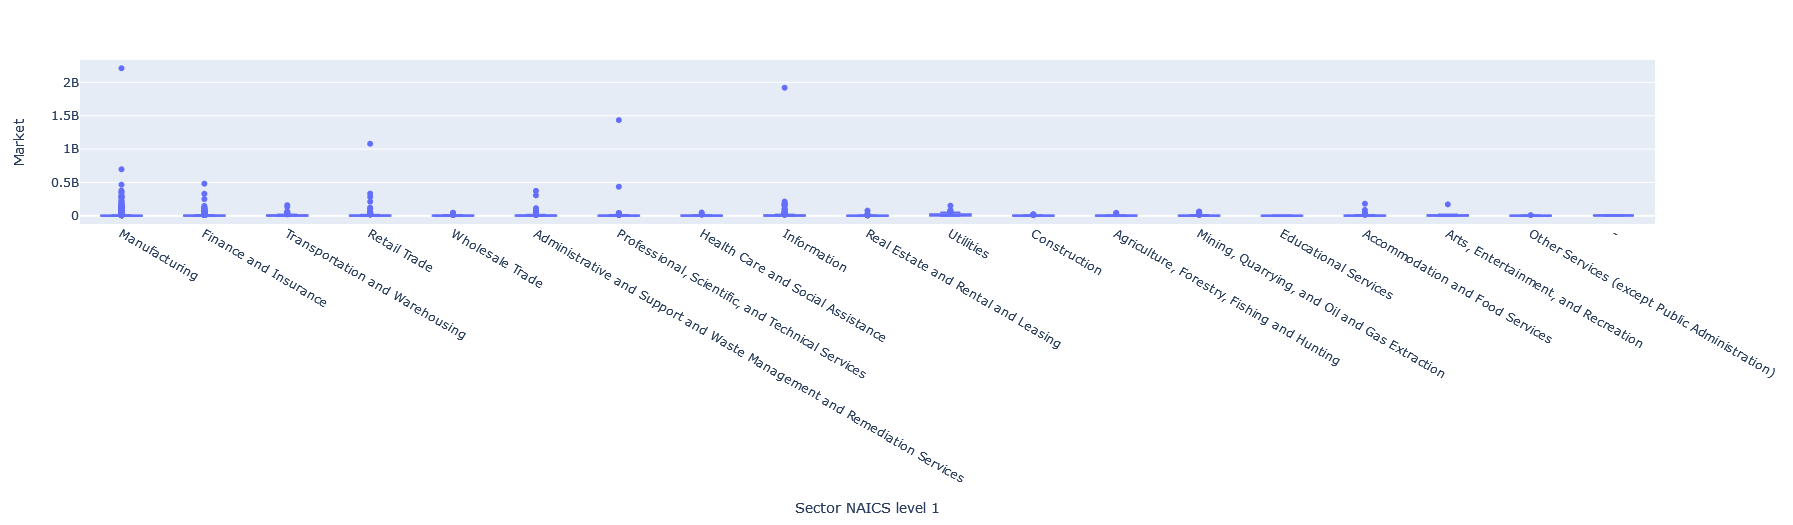

TANTO EN LA DESCRIPCIÓN DE MARKET COMO EN EL GRÁFICO SE OBSERVA QUE AL MENOS EL 75% DE LAS EMPRESAS NO PASAN DE LOS 0.5 BILLONES, MIENTRAS QUE HAY SOLO UNAS POCAS QUE SOBREPASAN EL BILLÓN O INCLUSO LLEGAN A LOS 2 BILLONES, COMO LO ES EN LA INDUSTRIA DE MANUFACTURING, RETAIL TRADE, PROFESSIONAL, SCIENTIFIC AND TECHNICAL SERVICES E INFORMATION, QUE ES DONDE SE VE QUE AFECTADA LA MEDIA DEL MARKET.

In [103]:
px.histogram(typical_firm, x = 'Sector NAICS\nlevel 1', y = 'Market Mean')

FOTO DE HISTOGRAMA DE MARKET MEAN

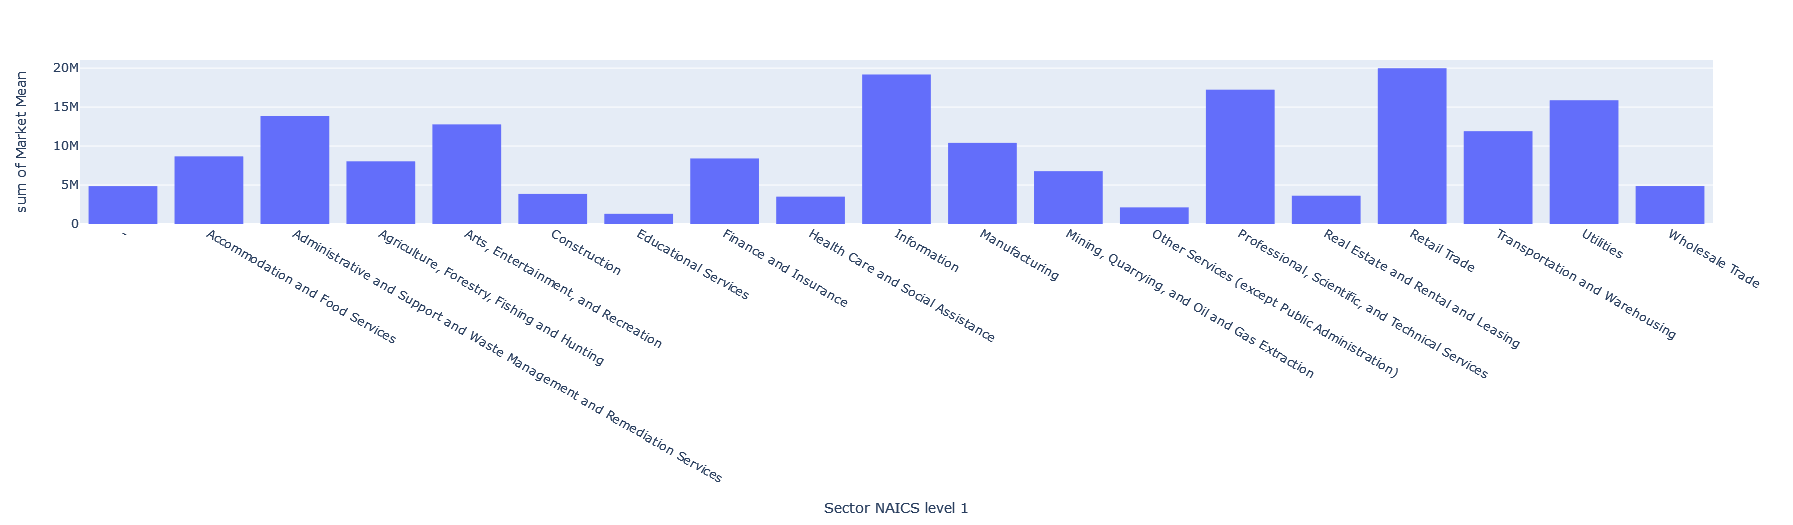

EN CUANTO A LA DISTRIBUCIÓN DE LA VARIABLE MARKET, VEMOS QUE SE DISTRIBUYE PRINCIPALMENTE EN LA INDUSTRIA DE INFORMATION, RETAIL TRADE, PROFESSIONAL, SCIENTIFIC AND TECHNICAL SERVICES Y UTILITIES. QUE, COMO BIEN VIMOS ANTERIORMENTE, LA MAYORÍA SON LAS QUE CUENTAN CON LAS EMPRESAS DE MÁS ALTO VALOR Y QUE INFLUYEN EN NUESTRA MEDIA.

In [104]:
px.histogram(typical_firm, x = 'Sector NAICS\nlevel 1', y = 'Market Median')

FOTO DE HISTOGRAMA DE MARKET MEDIAN

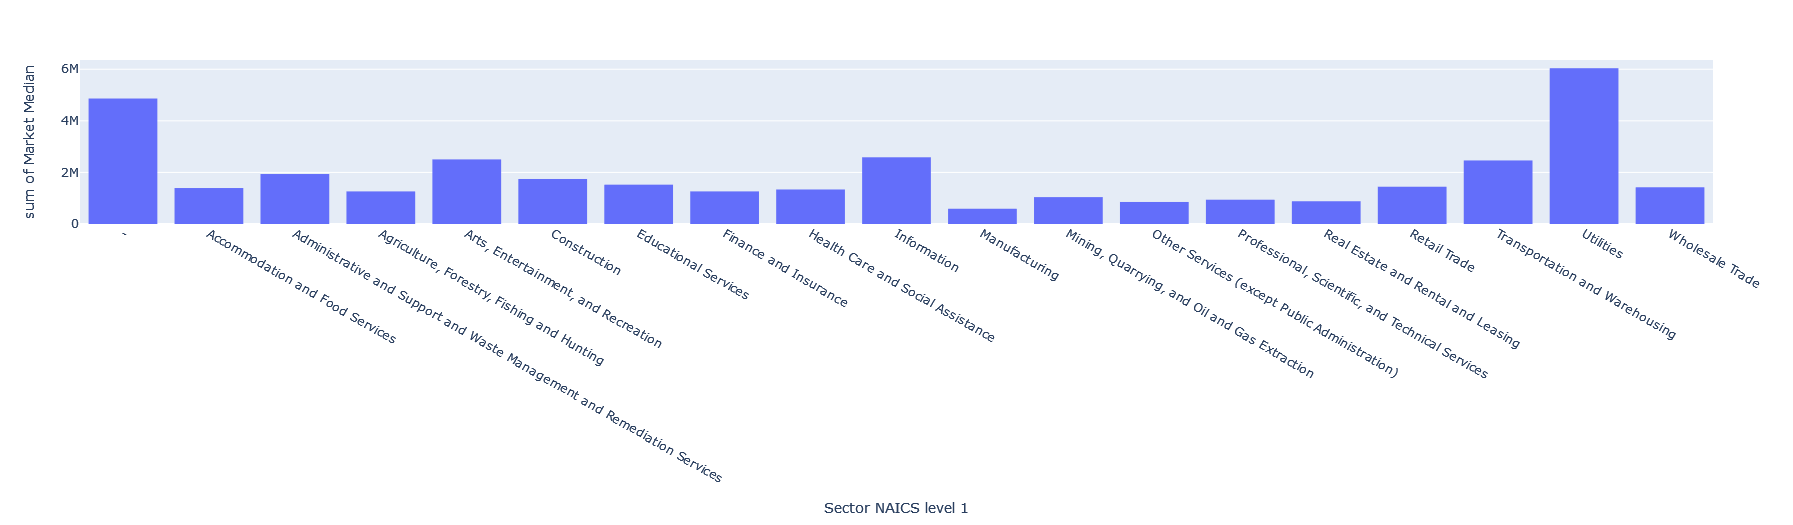

AHORA EVALUANDO VALORES REPRESENTATIVOS COMO LA MEDIANA, SE PUEDE VER UNA DISTRIBUCIÓN MÁS NORMALIZADA, DONDE DESTACAN LAS UTILITIES, POR LO QUE EN TÉRMINOS GENERALES TIENE UNA MAYOR PRESENCIA EN EL MERCADO.

In [105]:
last_quarter['Market'].describe()

count    3.548000e+03
mean     1.095980e+07
std      6.632062e+07
min      3.490000e+01
25%      1.907523e+05
50%      1.105076e+06
75%      4.607257e+06
max      2.212838e+09
Name: Market, dtype: float64

In [106]:
last_quarter['Market'].median()

1105075.91083

AHORA TOMANDO EN CUENTA LOS DATOS TOTALES DE MARKET, VEMOS NUEVAMENTE QUE LA MEDIA SUPERA EL 75% DE LAS EMPRESAS, ESTO DEBIDO A LAS EMPRESAS DE VALORES TAN ALTOS, POR LO QUE LA MEDIA DEJA DE SER REPRESENTATIVA Y ES UNA MEJOR OPCIÓN LA MEDIANA.

ESTA MEDIANA PODEMOS COMPARARLA CON LAS INDUSTRIAS Y OBSERVAR QUE TIENE CIERTA SIMILITUD ÚNICAMENTE CON LAS INDUSTRIAS DE MENOR VALOR, COMO FINANCE AND INSURANCE O MINING, QUARRYING, AND OIL AND GAS EXTRACTION.

In [107]:
market_median_mean = typical_firm['Market Median'].mean()
market_median_mean

1900659.9883757897

ANALIZANDO LOS DATOS DE LAS MEDIANAS POR INDUSTRIA Y OBTENIENDO UN PROMEDIO DE LAS MISMAS ENCONTRAMOS EL VALOR TÍPICO DE MARKET DE LAS EMPRESAS, SIENDO DE $1,900,659.98. QUE SI BIEN ES CASI EL DOBLE DE NUESTRA MEDIANA GENERAL, TIENE UN VALOR MÁS SIGNIFICATIVO AL ALINEARSE CON EL COMPORTAMIENTO GENERAL DE LAS INDUSTRIAS, ABARCANDO UN MAYOR RANGO SIMILAR.

In [108]:
px.box(last_quarter, x = 'Sector NAICS\nlevel 1', y = 'Book')

FOTO DE BOX PLOT DE BOOK POR INDUSTRIA

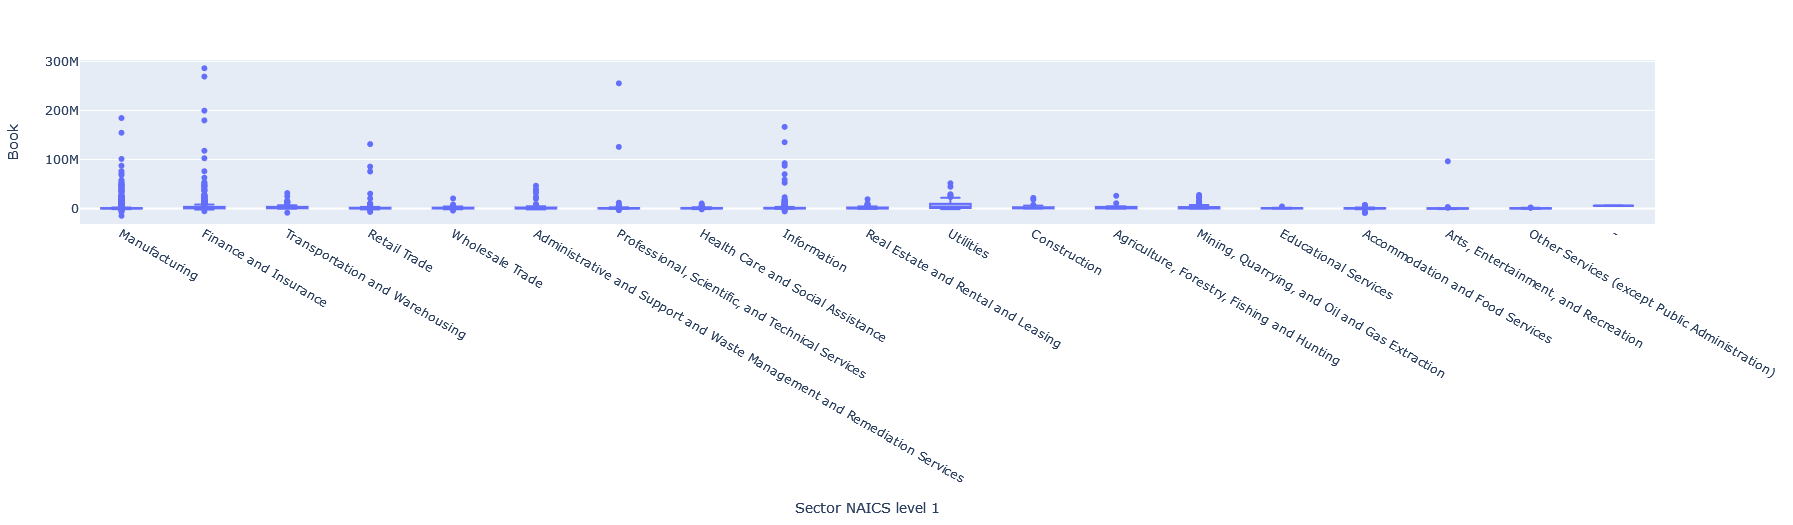

DE IGUAL MANERA PODEMOS VER COMO EN BOOK TAMBIÉN SE ENCUENTRA AL MENOS EL 75% DE LAS EMPRESAS DENTRO DE UNA MEDIA DE 100 MILLONES, CON OTRAS POCAS QUE SOBREPASAN EN GRAN MEDIDA A LAS DEMÁS, COMO LO ES LA INDUSTRIA DE MANUFACTURING, FINANCE AND INSURANCE, RETAIL TRADE, PROFESSIONAL, SCIENTIFIC AND TECHNICAL SERVICES, INFORMATION Y ARTS, ENTERTAINMENT AND RECREATION.

In [109]:
px.histogram(typical_firm, x = 'Sector NAICS\nlevel 1', y = 'Book')

FOTO DE HISTOGRAMA DE BOOK MEAN

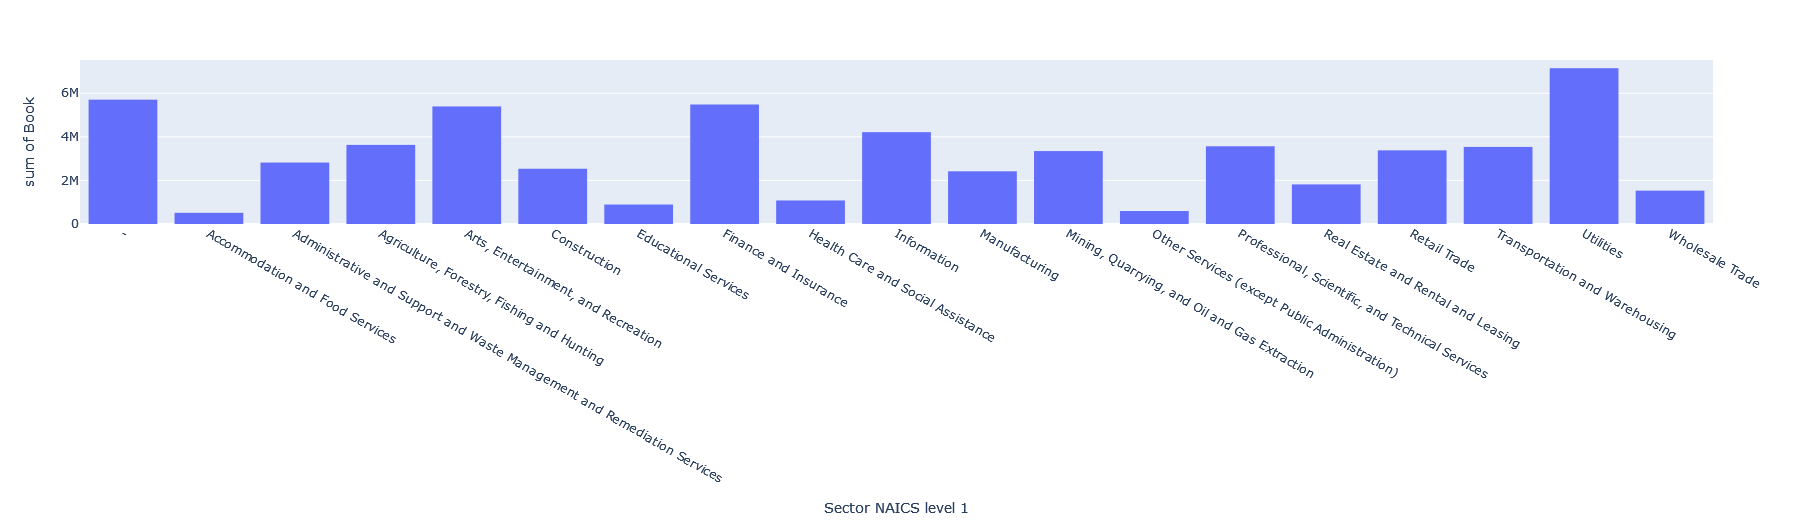

NUEVAMENTE VEMOS UNA DISTRIBUCIÓN NO UNIFORME DE LOS DATOS DADOS LOS VALORES TAN ALTOS EN CIERTAS INDUSTRIAS COMO LO SON LAS UTILITIES O FINANCE AND SERVICE.

In [110]:
px.histogram(typical_firm, x = 'Sector NAICS\nlevel 1', y = 'Book Median')

FOTO DE HISTOGRAMA DE BOOK MEDIAN

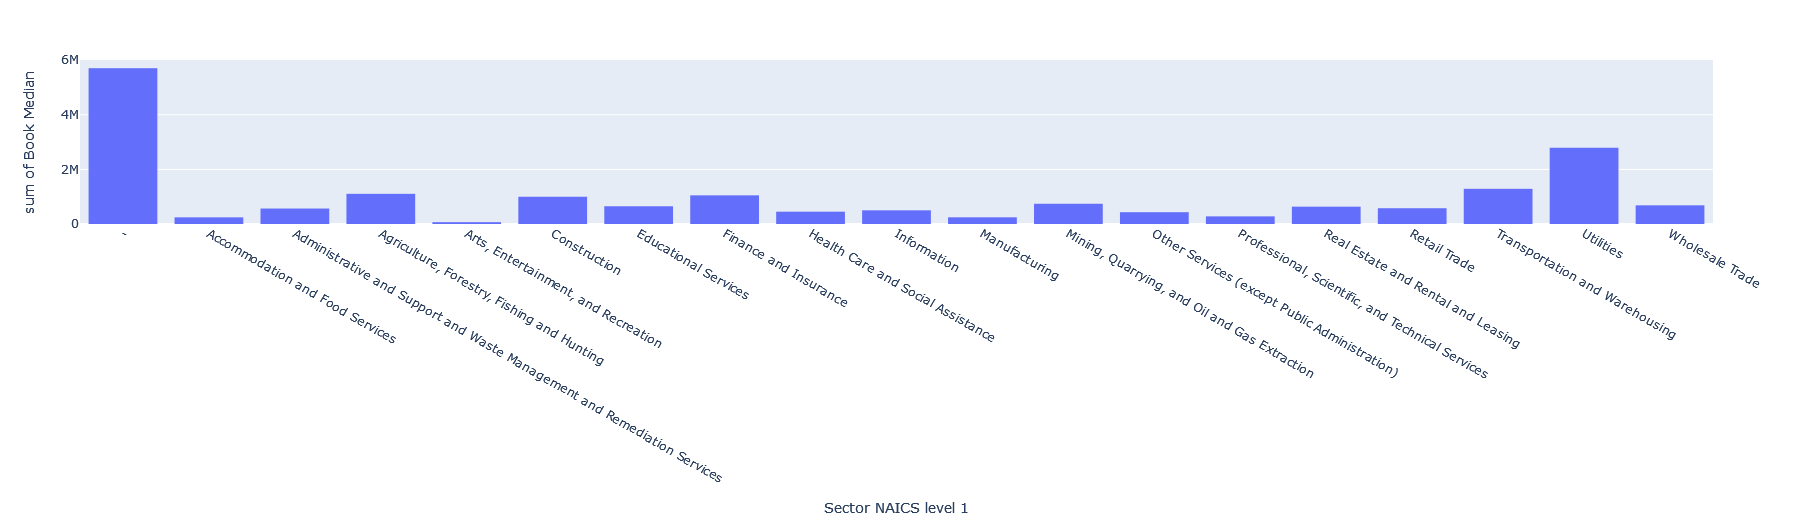

TOMANDO EN CUENTA LAS MEDIANAS PODEMOS VER UNA DISTRIBUCIÓN NORMALIZADA,AUNQUE CON MAYOR PRESENCIA EN EL MERCADO POR PARTE DE UTILITIES Y -.

In [111]:
last_quarter['Book'].describe()

count    3.362000e+03
mean     3.331749e+06
std      1.386098e+07
min     -1.479100e+07
25%      1.060878e+05
50%      4.577370e+05
75%      1.792766e+06
max      2.861430e+08
Name: Book, dtype: float64

In [112]:
last_quarter['Book'].median()

457737.0

ANALIZANDO LOS DATOS GENERALES DE BOOK COMPROBAMOS NUEVAMENTE NUESTO PLANTEAMIENTO DE QUE LA MEDIA NO ES SIGNIFICATIVA PUES SUPERA AL 75% DE LAS EMPRESAS. EN CAMBIO LA MEDIANA TIENE UN COMPORTAMIENTO MÁS CERCANO A NUESTROS DATOS GENERALES, AUNQUE AL IGUAL QUE EN MARKET, SOLO CON LOS DE VALORES MÁS BAJOS COMO OTHER SERVICES O INFORMATION.

In [113]:
book_mean = typical_firm['Book Median'].mean()
book_mean

1000405.1720526316

AL OBTENER EL PROMEDIO DE LAS MEDIANAS POR INDUSTRIA LLEGAMOS AL VALOR TÍPICO, SIENDO DE $1,000,405. QUE ES CASI EL DOBLE DE LA MEDIANA GENERAL, ESTE PARECE SER EL VALOR IDEAL, AUNQUE TIENE CIERTO RANGO DE SESGO DADOS LOS VALORES TAN INUSUALES DE UTILITIES Y -.

## For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

In [114]:
px.box(last_quarter, x = 'Sector NAICS\nlevel 1', y = 'Operating Profit Margin (OPM)')

FOTO DE BOX PLOT DE OPM POR INDUSTRIA

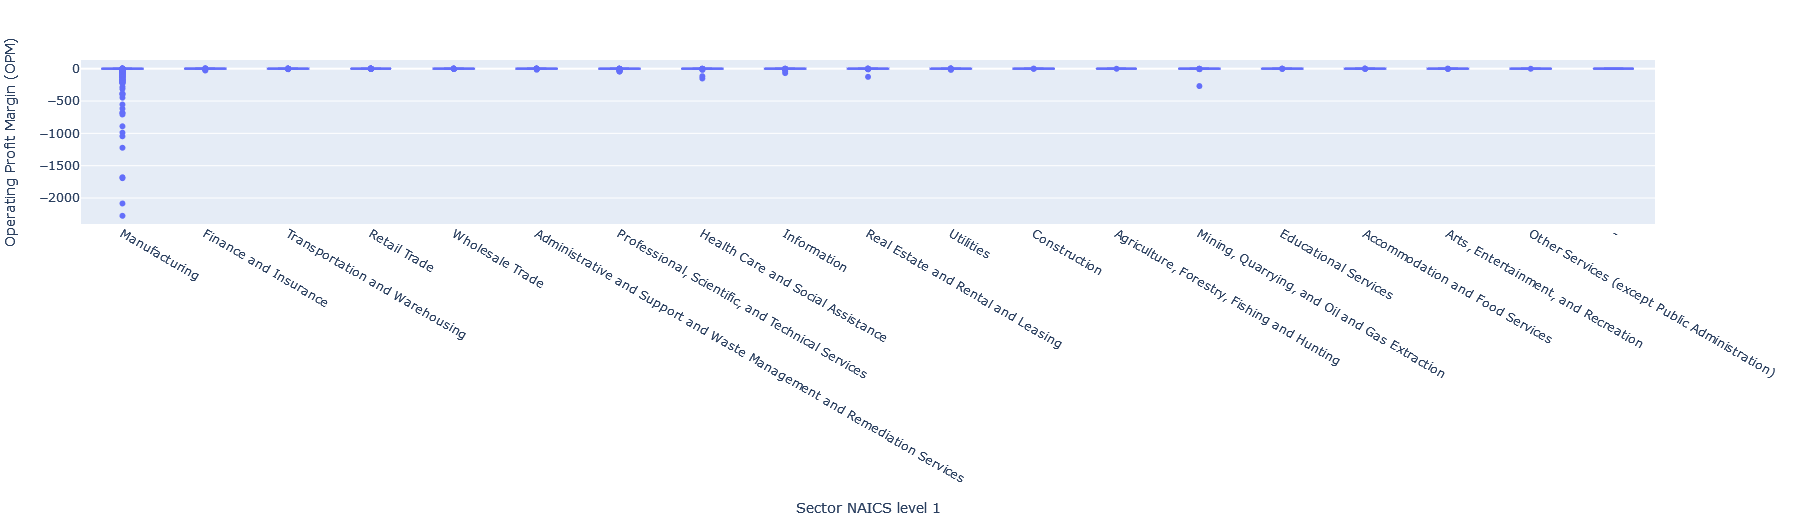

SE PUEDE VER QUE LA GRAN MAYORÍA DE LAS INDUSTRIAS CUENTAN CON UN OPM MUY BAJO, CERCANO AL CERO. AUNQUE CON CIERTAS EMPRESAS, PARTICULARMENTE EN LA INDUSTRIA DE MANUFACTURING, DONDE ES INUSUALMENTE BAJO.

In [115]:
last_quarter['Operating Profit Margin (OPM)'].describe()

count    3089.000000
mean       -8.082315
std        86.734683
min     -2274.914286
25%        -0.083677
50%         0.085687
75%         0.230803
max         7.453061
Name: Operating Profit Margin (OPM), dtype: float64

DADOS LOS VALORES TAN EXTREMOS EN MANUFACTURING NUESTRA MEDIA SE VIÓ AFECTADA, SUPERANDO EN GRAN MEDIDA EL 75% DE LAS INDUSTRIAS, POR LO QUE DEJÓ DE SER SIGNIFICATIVA, LO IDEAL ES USAR LA MEDIANA.

In [123]:
px.histogram(typical_firm, x = 'Sector NAICS\nlevel 1', y = 'OPM Median')

FOTO DE HISTOGRAMA DE OPM MEDIAN

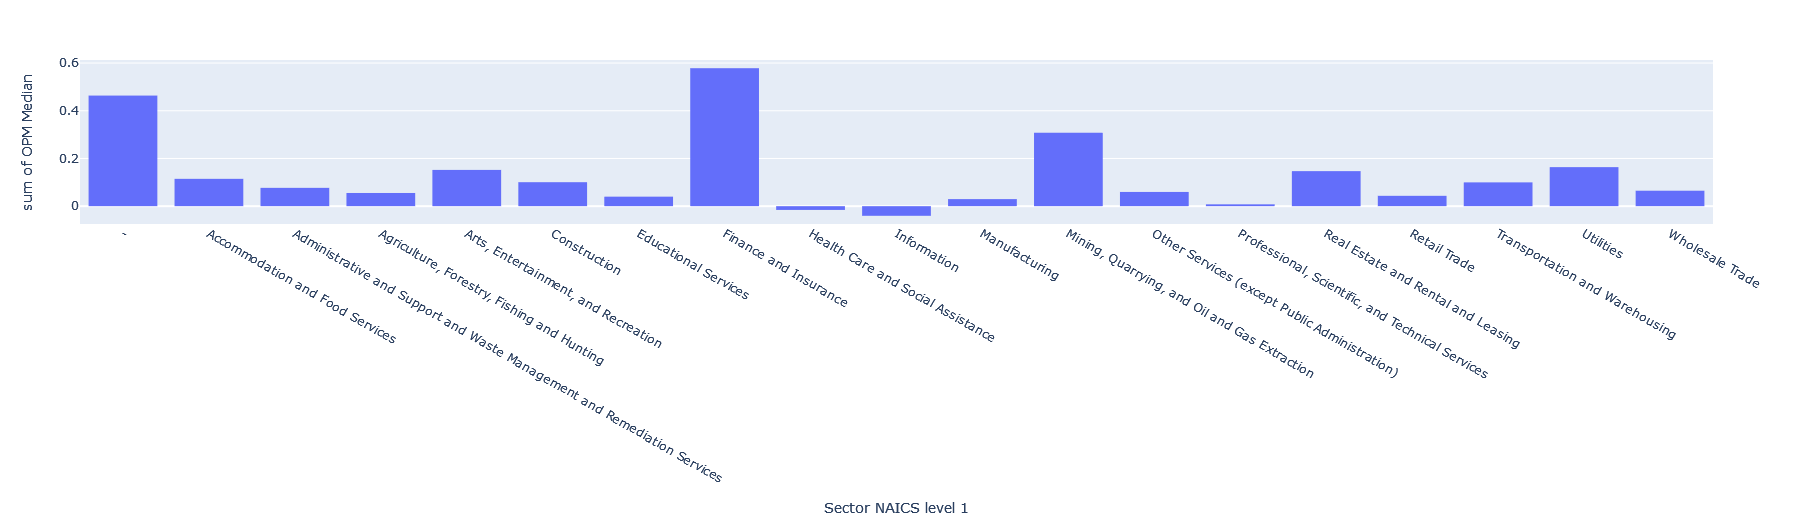

RETOMANDO LA MEDIANA COMO MEDIDA DE ANÁLISIS, DONDE TENEMOS INFORAMACIÓN DE TODAS LAS INDUSTRIAS, VEREMOS QUE EL 68% DE LAS INDUSTRIAS SE ENCUENTRAN POR DEBAJO DEL 0.2, AL 15% POR ENCIEMA DEL 0.2, Y EL RESTO EN VALORES NEGATIVOS. DESTACANDO FINANCE AND INSURANCE CON EL OPM MÁS ALTO.

## Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [117]:
last_quarter[['Market','Sector NAICS\nlevel 1']].sort_values('Market', ascending=False).head(10)

Market                              Sector NAICS\nlevel 1
firm  qdate                                                                  
AAPL  2022Q2  2.212838e+09                                      Manufacturing
MSFT  2022Q2  1.920840e+09                                        Information
GOOGL 2022Q2  1.435042e+09   Professional, Scientific, and Technical Services
AMZN  2022Q2  1.080624e+09                                       Retail Trade
TSLA  2022Q2  6.976698e+08                                      Manufacturing
UNH   2022Q2  4.818731e+08                              Finance and Insurance
JNJ   2022Q2  4.671001e+08                                      Manufacturing
META  2022Q2  4.363946e+08   Professional, Scientific, and Technical Services
NVDA  2022Q2  3.789750e+08                                      Manufacturing
V     2022Q2  3.743426e+08  Administrative and Support and Waste Managemen...

SE OBTUVIERON LAS 10 EMPRESAS CON MAYOR VALOR DE MERCADO EN ORDEN DESCENDENTE, CABE RESALTAR QUE PRÁCTICAMENTE LA MITAD DE ELLAS SON DE LA INDUSTRIA MANUFACTURING, QUE JUNTO CON LAS DEMÁS INDUSTRIAS RECORDEMOS QUE ERAN LAS QUE TENÍAN LOS PICOS MÁS ALTOS EN GRÁFICOS ANTERIORES, LO QUE NOS LLEVÓ A UTILIZAR LA MEDIANA PARA UN MEJOR ANÁLISIS, DADO QUE LA MEDIA YA SOBREPASABA EL VALOR TÍPICO.

In [118]:
print(last_quarter['Market'].median())

1105075.91083


TOMANDO LA MEDIANA DE $1,105,075.91083, SE PUEDE VER QUE ESTAS EMPRESAS GIGANTES ESTÁN YA MUY POR ENCIMA DEL VALOR TÍPICO, SIMPLEMENTE LA DECIMA EMPRESA ES 338.74 VECES MÁS GRANDE QUE LA MEDIANA DEL MERCADO.

In [119]:
px.histogram(last_quarter['Market'])

FOTO DE HISTOGRAMA DE MARKET

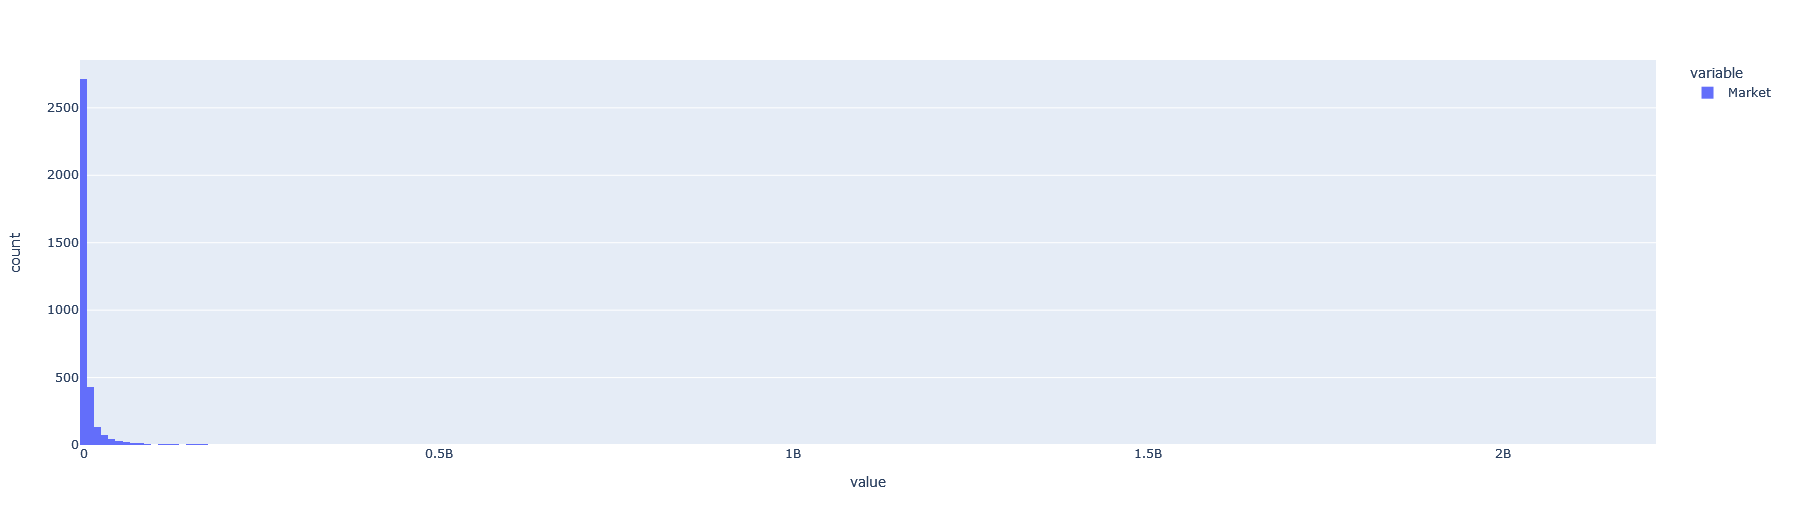

DE MANERA VISUAL AQUÍ SE APRECIA COMO SE ENCUENTRA LA DISTRIBUCIÓN DE MARKET, CON UN SESGO HACIA LA IZQUERDA, DONDE LA GRAN MAYORÍA DE LAS EMPRESAS CUENTAN CON UN VALOR DE APROXIMADAMENTE 5 MILLONES EN MARKET, MIENTRAS QUE DEL OTRO EXTREMO TENEMOS NUESTRAS EMPRESAS MÁS GRANDES, A PENAS VISIBLES.

## Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [120]:
last_quarter[['Book','Sector NAICS\nlevel 1']].sort_values('Book', ascending=False).head(10)

Book                             Sector NAICS\nlevel 1
firm  qdate                                                                
JPM   2022Q2  286143000.0                             Finance and Insurance
BAC   2022Q2  269118000.0                             Finance and Insurance
GOOGL 2022Q2  255419000.0  Professional, Scientific, and Technical Services
C     2022Q2  199626000.0                             Finance and Insurance
XOM   2022Q2  184508000.0                                     Manufacturing
WFC   2022Q2  179793000.0                             Finance and Insurance
MSFT  2022Q2  166542000.0                                       Information
CVX   2022Q2  154562000.0                                     Manufacturing
T     2022Q2  135307000.0                                       Information
AMZN  2022Q2  131402000.0                                      Retail Trade

NUEVAMENTE SE OBTUVIERON LAS EMPRESAS EN ORDEN DESCENDENTE, CABE DESTACAR QUE 3 EMPRESAS QUE  ERAN DE LAS 10 MÁS GRANDES EN MARKET LO SON IGUALMENTE EN BOOK, COMO LO ES GOOGL, MSFT Y AMXN. EN ESTE CASO, LA MAYORÍA DE LAS INDUSTRIAS AHORA SON DE FINANCE AND INSURANCE.

In [121]:
print(last_quarter['Book'].median())

457737.0


RECORDEMOS QUE DADOS LOS PICOS TAN GRANDES DE VALORES, OPTAMOS POR UTILIZAR LA MEDIANA COMO VALOR TÍPICO, QUE ES $457,737. EVIDENTEMENTE LAS EMPRESAS MÁS GRANDES LO SOBREPASAN POR MUCHO, SIENDO LA ÚLTIMA EMPRESA 287 VECES MÁS GRANDE QUE EL VALOR TÍPICO.

In [122]:
px.histogram(last_quarter['Book'])

FOTO DE HISTOGRAMA DE BOOK

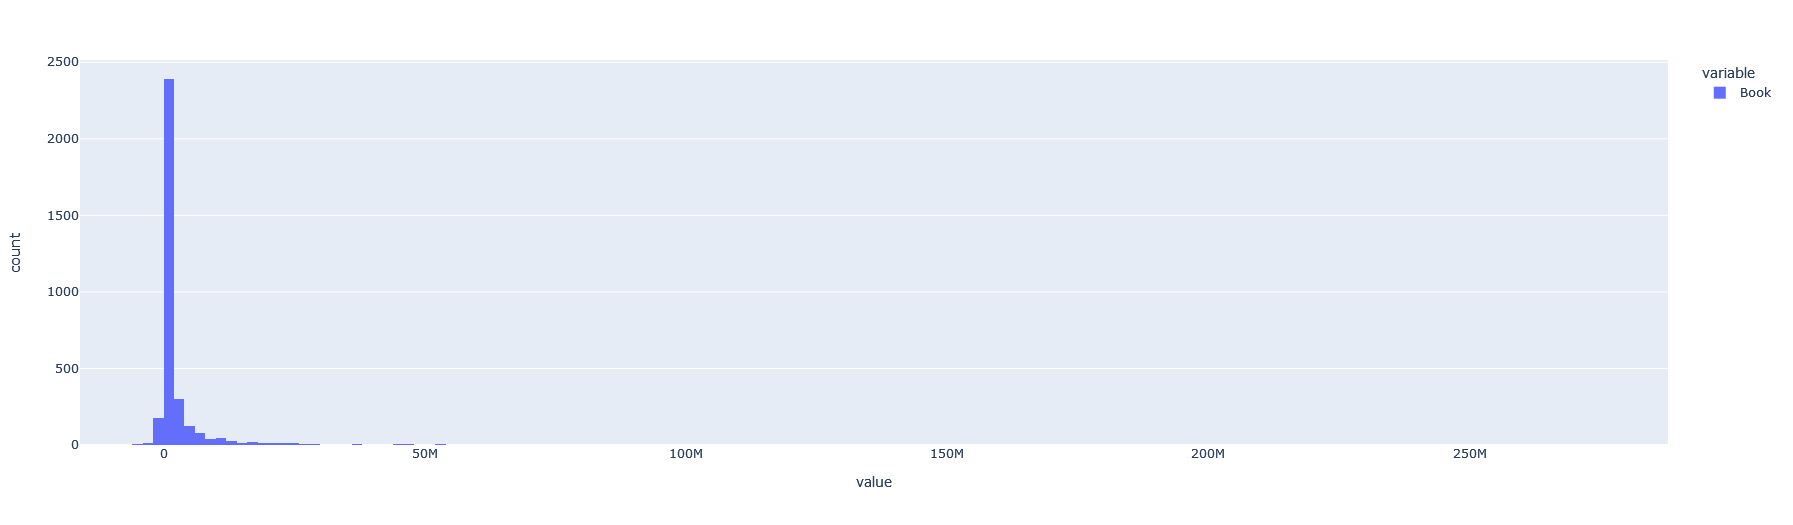

AL IGUAL QUE EN MARKET, SE OBSERVA UN SESGO A LA IZQUIERDA, DONDE LA MAYORÍA DE LAS EMPRESAS TIENEN UN BOOK DE ENTRE 0 Y 2 MILLONES, MIENTRAS QUE EN EL EXTREMOS DEL HISTOGRAMA TENEMOS UNOS CUANTOS PUNTOS, QUE SON NUESTRAS EMPRESAS MÁS GRANDES.

# 2.2.1.2 Considering the whole history of financial data for all firms

## How can you measure firm profitability that can be used to compare performance among firms of different sizes? Select and justify at least 3 measures and show descriptive statistics.

SE HACE OTRA COPIA DEL DATAFRAME

In [164]:
df_history = df_copy.copy()

In [125]:
# Correlación con revenue
df_corrs = df_history.corr()["revenue"]
df_corrs.sort_values(ascending=False)

revenue                          1.000000
cogs                             0.931301
sgae                             0.676649
Market                           0.615077
stockholderequity                0.594528
Book                             0.594523
EBIT                             0.588770
sharesoutstanding                0.494223
Net Income                       0.489022
incometax                        0.448551
finexp                           0.378053
longdebt                         0.377548
otheropexp                       0.333878
totalassets                      0.322422
shortdebt                        0.300447
totalliabilities                 0.274419
originalprice                    0.148798
r2                               0.024736
r                                0.024736
Operating Profit Margin (OPM)    0.005302
Book-to-Market ratio             0.004995
Earnings Per Share (EPS)         0.002883
Sales Anual Growth              -0.001108
adjprice                        -0

In [126]:
df_history[['cogs', 'sgae', 'Market']].describe()

cogs          sgae        Market
count  1.578270e+05  1.578270e+05  1.534490e+05
mean   8.033615e+05  4.027368e+05  1.015524e+07
std    3.753014e+06  1.481353e+06  4.537656e+07
min   -4.460800e+06 -3.373000e+06  9.322199e-01
25%    2.220000e+02  9.277000e+03  3.379509e+05
50%    4.346900e+04  5.600200e+04  1.570573e+06
75%    3.715230e+05  2.167845e+05  5.477976e+06
max    1.155220e+08  5.251500e+07  2.913284e+09

CON EL FIN DE EVALUAR LA RENTABILIDAD, SE BUSCÓ LA CORRELACIÓN DEL REVENUE CON EL RESTO DE LAS VARIABLES, SIENDO LAS 3 QUE ESTÁN MÁS RELACIONADAS EL COGS, EL SGAE Y EL MARKET, CON UN 93.13%, UN 67.66% Y UN 61.50% DE CORRELACIÓN RESPECTIVAMENTE. POR LO QUE ES MUCHO MÁS PROBABLE MEDIR Y PREDECIR LA RENTABILIDAD EN BASE A ESTAS VARIABLES.

DE IGUAL MANERA, 2 DE NUESTRAS 3 VARIABLES SON LA BASE PARA LOS EARNINGS PER SHARE, QUE ES, EFECTIVAMENTE, UNA MÉTRICA PARA MEDIR LA RENTABILIDAD.

## Calculate and explain earnings per share deflated by price.

AL INICIO DE NUESTRO NOTEBOOK SE REALIZÓ EL CÁLCULO DEL EPSP, A CONTINUACIÓN SE MUESTRA NUEVAMENTE EL CÓDIGO COMENTADO PARA OBSERVAR SU CÁLCULO.

In [ ]:
# df_copy['EBIT'] = df_copy['revenue'] - df_copy['cogs'] - df_copy['sgae'] - df_copy['otheropexp']
# df_copy['Net Income'] = df_copy['EBIT'] + df_copy['extraincome']- df_copy['incometax'] - df_copy['finexp']
# df_copy['Earnings Per Share (EPS)'] = df_copy['Net Income'] / df_copy['sharesoutstanding']

# df_copy['EPSP (deflated by price)'] = df_copy['Earnings Per Share (EPS)'] / df_copy['originalprice']

A MODO DE FÓRMULAS SE REQUIRIERON 3 PARA LLEGAR AL EPSP, LAS CUALES SON:

* EBIT = revenue - cogs- sgae - otheropexp

* Net Income = EBIT + extraincome - incometax - finexp

* EPS = Net Income / sharesoutstanding

* EPSP = EPS / originalprice

EL EPS ES UNA FORMA DE MEDIR LA RENTABILIDAD O VALOR DE UN CORPORATIVO, INDICA CUANTO DINERO PUEDE HACER LA EMPRESA POR CADA ACCIÓN.

EL EPSP ES LA TASA COMPARATIVA CON EL PRECIO ORIGINAL DE LA ACCIÓN.

In [127]:
df_history[['EPSP (deflated by price)']]

EPSP (deflated by price)
firm qdate                           
A    2000Q1                       NaN
     2000Q2                  0.004977
     2000Q3                  0.006992
     2000Q4                  0.012207
     2001Q1                  0.010971
...                               ...
ZYNE 2021Q2                       NaN
     2021Q3                       NaN
     2021Q4                       NaN
     2022Q1                       NaN
     2022Q2                       NaN

[323816 rows x 1 columns]

NUESTROS DATOS Y SU RESPECTIVO EPSP.

# 2.2.2 About statistical modeling

## You have to select a group of firms according to their general industry classification:

* Manufacturing industries

* Commercial industries (retail and wholesale)

* Service industries

* Financial services

In [167]:
df_services = df_history.copy()

In [168]:
df_services.dropna(subset=["Market"], how="all", inplace=True)

In [169]:
def dense_inclusive_pct(x):
    r = x.rank(method='dense') - 1
    return r / r.max() * 100

df_services["pct"]=df_services.groupby('q')['Market'].apply(dense_inclusive_pct).astype(int)

df_services["isSmall"] = df_services.pct <= 33
df_services["isSmall"] = df_services["isSmall"].astype(int)

df_services["isMedium"] = (df_services.pct <= 66) & (df_services.pct > 33) 
df_services["isMedium"] = df_services["isMedium"].astype(int)

CLASIFICACIÓN DE EMPRESAS POR TAMAÑO SEGÚN EL PERCENTIL Y EL TRIMESTRE.

In [170]:
df_services

q    revenue       cogs          sgae  otheropexp  \
firm qdate                                                            
A    2000Q1  2000q1        NaN        NaN           NaN         NaN   
     2000Q2  2000q2  2485000.0  1261000.0  1.010000e+06         0.0   
     2000Q3  2000q3  2670000.0  1369000.0  1.091000e+06         0.0   
     2000Q4  2000q4  3372000.0  1732000.0  1.182000e+06         0.0   
     2001Q1  2001q1  2841000.0  1449000.0  1.113000e+06         0.0   
...             ...        ...        ...           ...         ...   
ZYNE 2021Q2  2021q2        NaN        0.0  9.838494e+03         0.0   
     2021Q3  2021q3        NaN        0.0  1.021065e+04         0.0   
     2021Q4  2021q4        NaN        0.0  8.836436e+03         0.0   
     2022Q1  2022q1        NaN        0.0  8.903915e+03         0.0   
     2022Q2  2022q2        NaN        0.0  9.168770e+03         0.0   

              extraincome  finexp  incometax  totalassets  totalliabilities  \
firm qdate                                                                    
A    2000Q1           NaN     NaN        NaN          NaN               NaN   
     2000Q2  42000.000000   0.000    90000.0  7321000.000       2679000.000   
     2000Q3  28000.000000   0.000    83000.0  7827000.000       2925000.000   
     2000Q4  10000.000000   0.000   163000.0  8425000.000       3160000.000   
     2001Q1  -6000.000000   0.000   119000.0  9208000.000       3667000.000   
...                   ...     ...        ...          ...               ...   
ZYNE 2021Q2   -117.528220  -5.943        0.0    98195.904         10496.647   
     2021Q3   -376.636750  -5.038        0.0    89996.170         11309.171   
     2021Q4     16.937906  -4.433        0.0    81171.507         10258.173   
     2022Q1    317.252110 -96.044        0.0    74381.029          9214.059   
     2022Q2   -775.927860 -91.691        0.0    67006.959          9765.086   

             ...      EBIT  Net Income  Earnings Per Share (EPS)  \
firm qdate   ...                                                   
A    2000Q1  ...       NaN         NaN                       NaN   
     2000Q2  ...  214000.0    166000.0                  0.367036   
     2000Q3  ...  210000.0    155000.0                  0.342152   
     2000Q4  ...  458000.0    305000.0                  0.668323   
     2001Q1  ...  279000.0    154000.0                  0.337150   
...          ...       ...         ...                       ...   
ZYNE 2021Q2  ...       NaN         NaN                       NaN   
     2021Q3  ...       NaN         NaN                       NaN   
     2021Q4  ...       NaN         NaN                       NaN   
     2022Q1  ...       NaN         NaN                       NaN   
     2022Q2  ...       NaN         NaN                       NaN   

             EPSP (deflated by price)  Sales Anual Growth  \
firm qdate                                                  
A    2000Q1                       NaN                 NaN   
     2000Q2                  0.004977                 NaN   
     2000Q3                  0.006992                 NaN   
     2000Q4                  0.012207                 NaN   
     2001Q1                  0.010971                 NaN   
...                               ...                 ...   
ZYNE 2021Q2                       NaN                 NaN   
     2021Q3                       NaN                 NaN   
     2021Q4                       NaN                 NaN   
     2022Q1                       NaN                 NaN   
     2022Q2                       NaN                 NaN   

             Operating Profit Margin (OPM) Book-to-Market ratio pct isSmall  \
firm qdate                                                                    
A    2000Q1                            NaN                  NaN  93       0   
     2000Q2                       0.086117             0.139169  91       0   
     2000Q3                       0.078652             0.221116  88    

In [171]:
df_services = df_services.drop(df_services[(df_services['Sector NAICS\nlevel 1'] == '-')].index)
df_services = df_services.drop(df_services[(df_services['Sector NAICS\nlevel 1'] == 'Agriculture, Forestry, Fishing and Hunting')].index)
df_services = df_services.drop(df_services[(df_services['Sector NAICS\nlevel 1'] == 'Arts, Entertainment, and Recreation')].index)
df_services = df_services.drop(df_services[(df_services['Sector NAICS\nlevel 1'] == 'Construction')].index)
df_services = df_services.drop(df_services[(df_services['Sector NAICS\nlevel 1'] == 'Finance and Insurance')].index)
df_services = df_services.drop(df_services[(df_services['Sector NAICS\nlevel 1'] == 'Health Care and Social Assistance')].index)
df_services = df_services.drop(df_services[(df_services['Sector NAICS\nlevel 1'] == 'Information')].index)
df_services = df_services.drop(df_services[(df_services['Sector NAICS\nlevel 1'] == 'Manufacturing')].index)
df_services = df_services.drop(df_services[(df_services['Sector NAICS\nlevel 1'] == 'Mining, Quarrying, and Oil and Gas Extraction')].index)
df_services = df_services.drop(df_services[(df_services['Sector NAICS\nlevel 1'] == 'Real Estate and Rental and Leasing')].index)
df_services = df_services.drop(df_services[(df_services['Sector NAICS\nlevel 1'] == 'Retail Trade')].index)
df_services = df_services.drop(df_services[(df_services['Sector NAICS\nlevel 1'] == 'Transportation and Warehousing')].index)
df_services = df_services.drop(df_services[(df_services['Sector NAICS\nlevel 1'] == 'Utilities')].index)
df_services = df_services.drop(df_services[(df_services['Sector NAICS\nlevel 1'] == 'Wholesale Trade')].index)

ELIMINAMOS LAS INDUSTRIAS QUE NO NECESITAMOS

In [173]:
df_services.columns

Index(['q', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome', 'finexp',
       'incometax', 'totalassets', 'totalliabilities', 'shortdebt', 'longdebt',
       'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding',
       'Ticker', 'Name', 'Class', 'Sector NAICS\nlevel 1', 'Exchange / Src',
       'Sector\nEconomatica', 'Sector NAICS\nlast available', 'partind',
       'lprice', 'r', 'r2', 'Book', 'Market', 'EBIT', 'Net Income',
       'Earnings Per Share (EPS)', 'EPSP (deflated by price)',
       'Sales Anual Growth', 'Operating Profit Margin (OPM)',
       'Book-to-Market ratio', 'pct', 'isSmall', 'isMedium'],
      dtype='object')

## Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.

* Do histograms for each factor/variables and interpret them

* Do plots to visualize the possible relationship each factor might have with the dependent variable.

* Show descriptive statistics of these factors

LAS VARIABLES A UTILIZAR SERÁN EL EPSP, SALES ANUAL GROWTH, OPM Y BOOK TO MARKET RATIO. ESTO DEBIDO A QUE SON BUENOS INDICADORES DEL RENDIMIENTO DE LAS EMPRESAS Y NOS DAN UNA IDEA GENERAL DEL TRAYECTO DE LA EMPRESA.

In [174]:
df_services[['EPSP (deflated by price)', 'Sales Anual Growth', 'Operating Profit Margin (OPM)', 'Book-to-Market ratio']]

EPSP (deflated by price)  Sales Anual Growth  \
firm qdate                                                  
ABM  2011Q3                  0.027465                 NaN   
     2011Q4                  0.016405                 NaN   
     2012Q1                  0.008141                 NaN   
     2012Q2                  0.011073                 NaN   
     2012Q3                  0.012252            0.002776   
...                               ...                 ...   
ZY   2021Q2                 -0.025120                 NaN   
     2021Q3                 -0.072845                 NaN   
     2021Q4                 -0.114060                 NaN   
     2022Q1                 -0.241984            0.282731   
     2022Q2                 -0.918060           -0.552573   

             Operating Profit Margin (OPM)  Book-to-Market ratio  
firm qdate                                                        
ABM  2011Q3                       0.037847              0.772611  
     2011Q4                       0.030906              0.723434  
     2012Q1                       0.016573              0.616663  
     2012Q2                       0.017842              0.773232  
     2012Q3                       0.021472              0.804143  
...                                    ...                   ...  
ZY   2021Q2                     -16.588925              0.141840  
     2021Q3                     -23.333170              0.353597  
     2021Q4                     -23.444883              0.596277  
     2022Q1                     -13.278230              1.154503  
     2022Q2                     -40.317388              1.865183  

[15236 rows x 4 columns]

In [175]:
px.histogram(df_services, x = 'EPSP (deflated by price)')

FOTO DE HISTOGRAMA DE EPSP

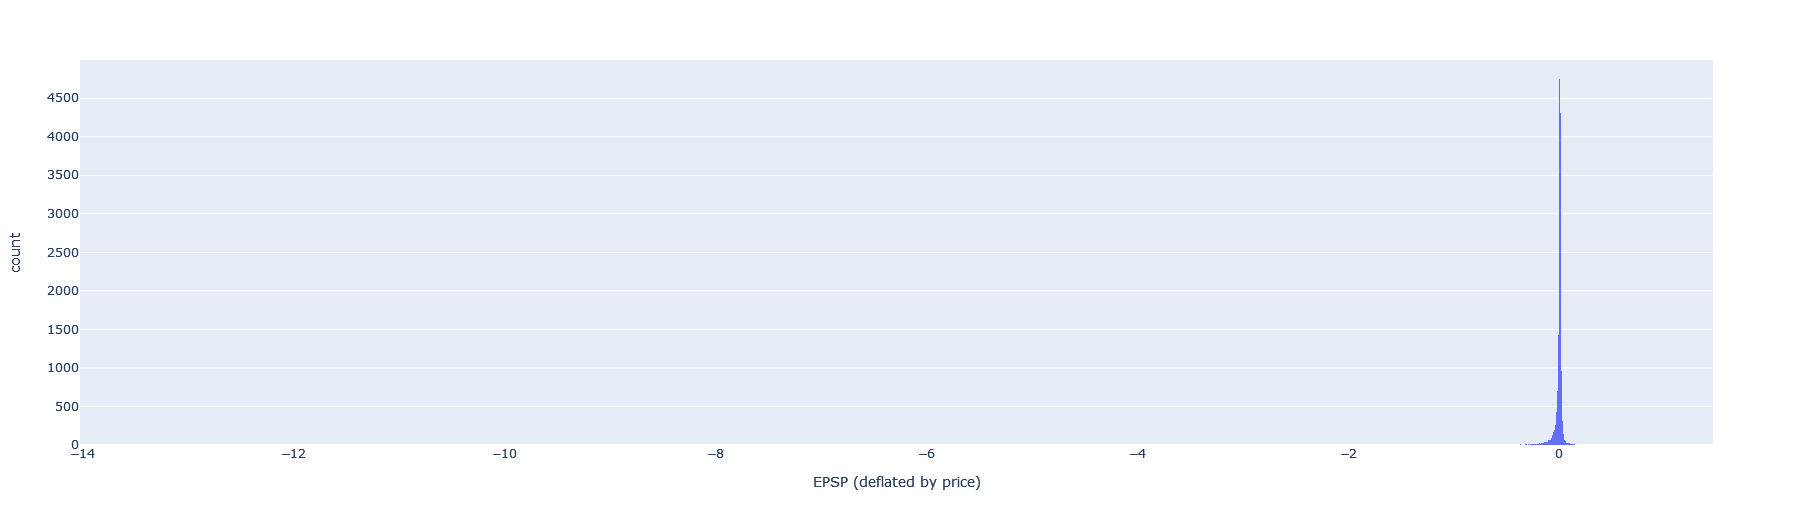

In [176]:
df_services['EPSP (deflated by price)'].describe()

count    14906.000000
mean        -0.010124
std          0.180485
min        -14.018716
25%         -0.002016
50%          0.007886
75%          0.013852
max          1.459035
Name: EPSP (deflated by price), dtype: float64

SE PUEDE VER COMO LA GRAN MAYORÍA DE LAS EMPRESAS CUENTAN CON UN EPSP CERCANO A 0, TANTO EN PROMEDIO COMO EN MEDIANA, CON UN MÍNIMO DE HASTA -14. EN GENERAL SE PUEDE VER CIERTA ESTABILIDAD ENTRE LAS EMPRESAS.

In [177]:
px.histogram(df_services, x = 'Sales Anual Growth')

FOTO DE HISTOGRAMA DE SALES ANUAL GROWTH

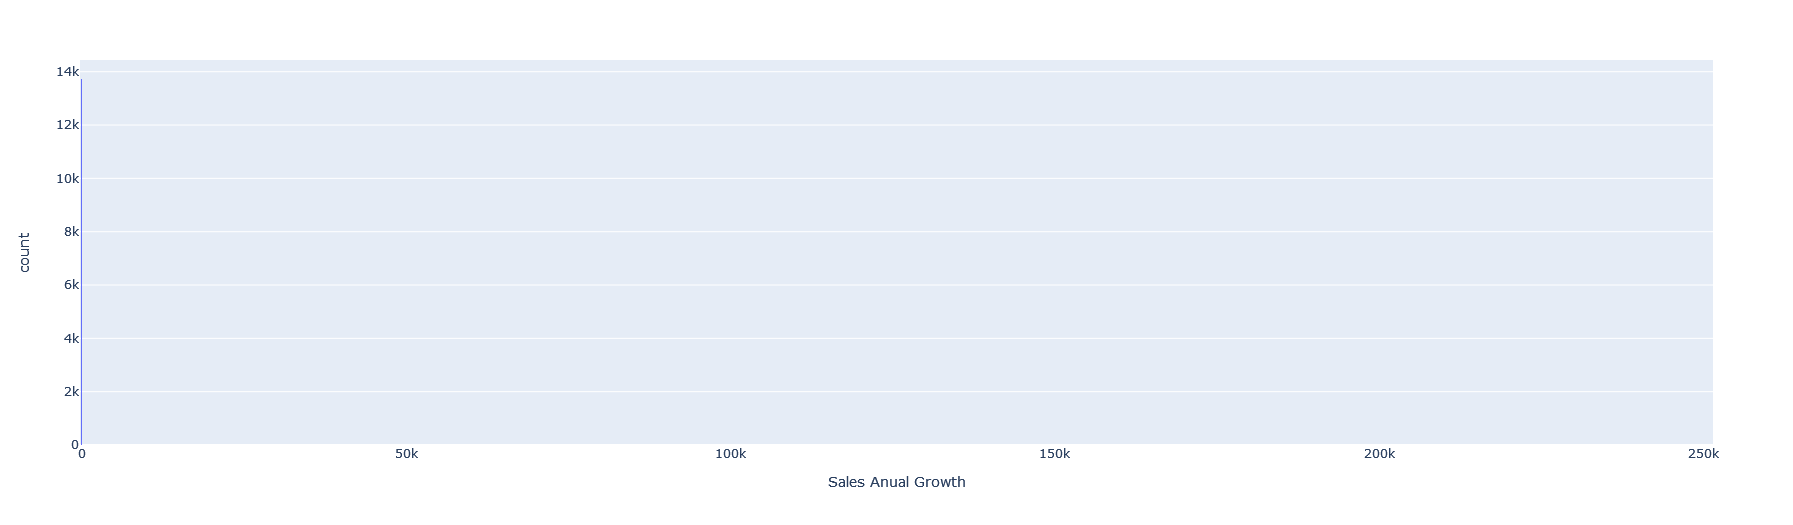

In [178]:
df_services['Sales Anual Growth'].describe()

count     13741.000000
mean         18.862058
std        2145.083212
min        -226.113055
25%          -0.017873
50%           0.070194
75%           0.179685
max      251440.000000
Name: Sales Anual Growth, dtype: float64

EN GENERAL PODEMOS VER UNA INCLINACIÓN HACIA LA IZQUIERDA, NUEVAMENTE LA GRAN MAYORÍA DE LOS DATOS SON CERCANOS AL 0, SIN EMBARGO, HAY UN OUTLIER MUY EXTREMO QUE HACE QUE NUESTRA MEDIA SE VEA AFECTADA, POR LO QUE LO IDEAL ES TOMAR LA MEDIANA.

In [179]:
px.histogram(df_services, x = 'Operating Profit Margin (OPM)')

FOTO DE HISTOGRAMA DE OPM

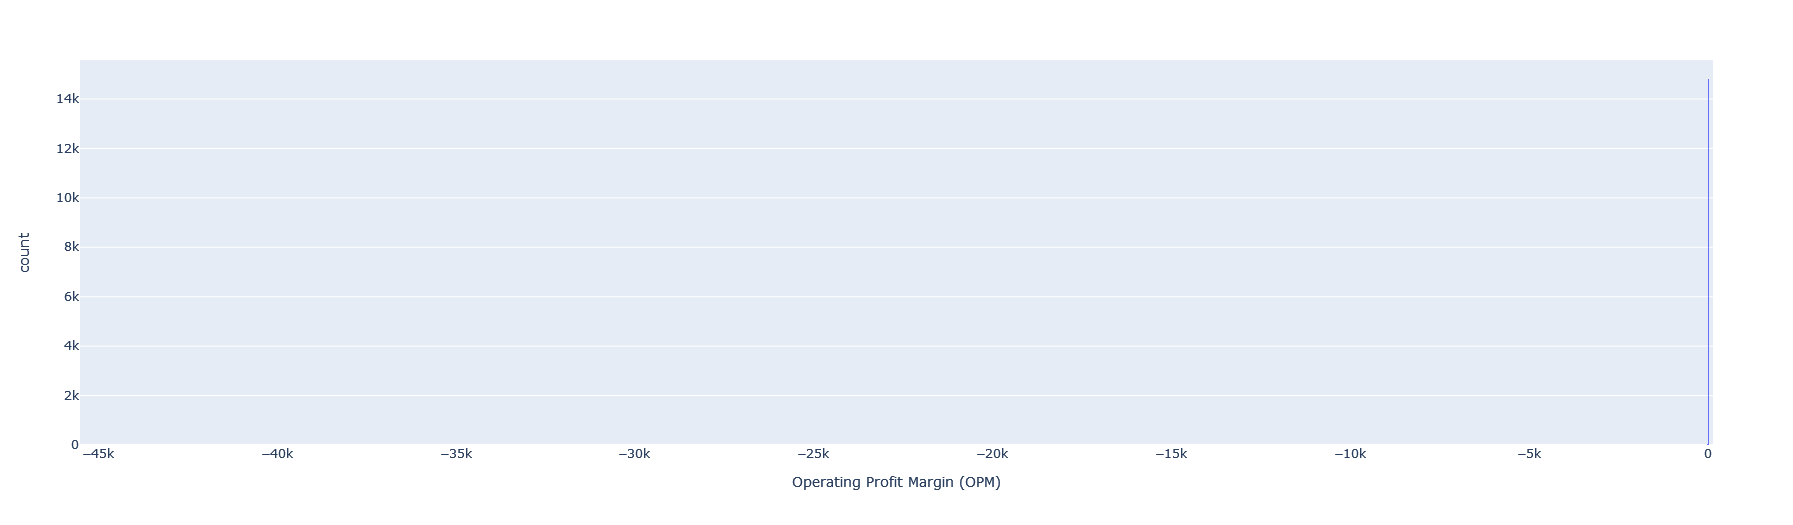

In [180]:
df_services['Operating Profit Margin (OPM)'].describe()

count    14906.000000
mean        -7.162046
std        432.027507
min     -45475.768750
25%          0.007656
50%          0.077010
75%          0.170051
max        129.649254
Name: Operating Profit Margin (OPM), dtype: float64

AL IGUAL QUE CON LAS VARIABLES ANTERIORES, LOS DATOS SE ENCUENTRAN CERCANOS AL CERO, ESTA VEZ CON UNA INCLINACIÓN HACIA LA DERECHA, YA QUE HAY UN MÍNIMO QUE HACE OUTLIER. LO IDEAL ES CONSIDERAR LA MEDIANA.

In [181]:
px.histogram(df_services, x = 'Book-to-Market ratio')

FOTO DE HISTOGRAMA DE BOOK-TO-MARKET-RATIO

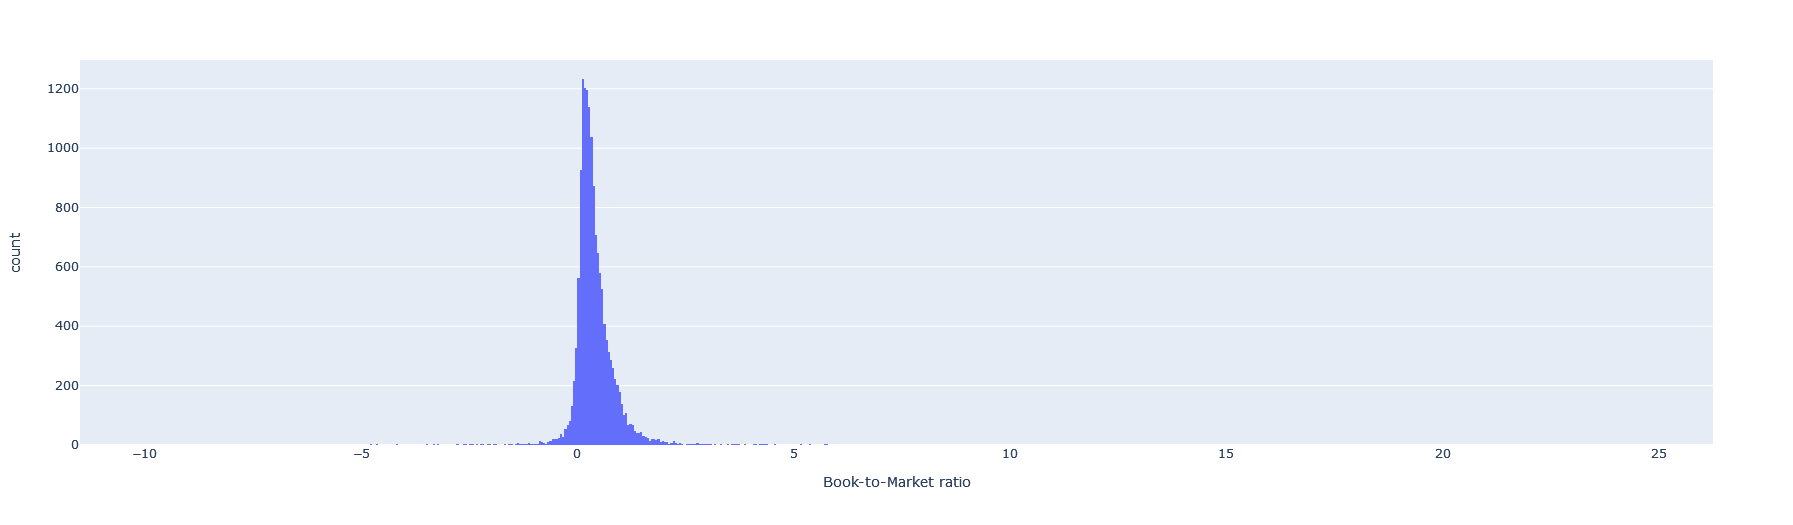

In [182]:
df_services['Book-to-Market ratio'].describe()

count    15170.000000
mean         0.388767
std          0.676051
min        -11.469108
25%          0.143671
50%          0.305350
75%          0.554035
max         26.225984
Name: Book-to-Market ratio, dtype: float64

AQUÍ SE PUEDE APRECIAR UNA MEJOR DISTRIBUCIÓN, CON UNA CAMPANA DE GAUSS EN LOS DATOS Y UNA MENOR DISPERSIÓN. SI BIEN HAY CIERTOS OUTLIERS, ESTOS NO AFECTAN EN GRAN MEDIDA LOS DATOS, LOS CUALES TAMBIÉN SE ENCUENTRAN CERCANOS AL 0. TANTO LA MEDIA COMO LA MEDIANA SON IDEALES.

In [184]:
df_services['F1r'] = df_services.groupby(["firm"])['r'].shift(-1)

In [186]:
px.histogram(df_services, x = 'F1r')

FOTO DE HISTOGRAMA DE F1R

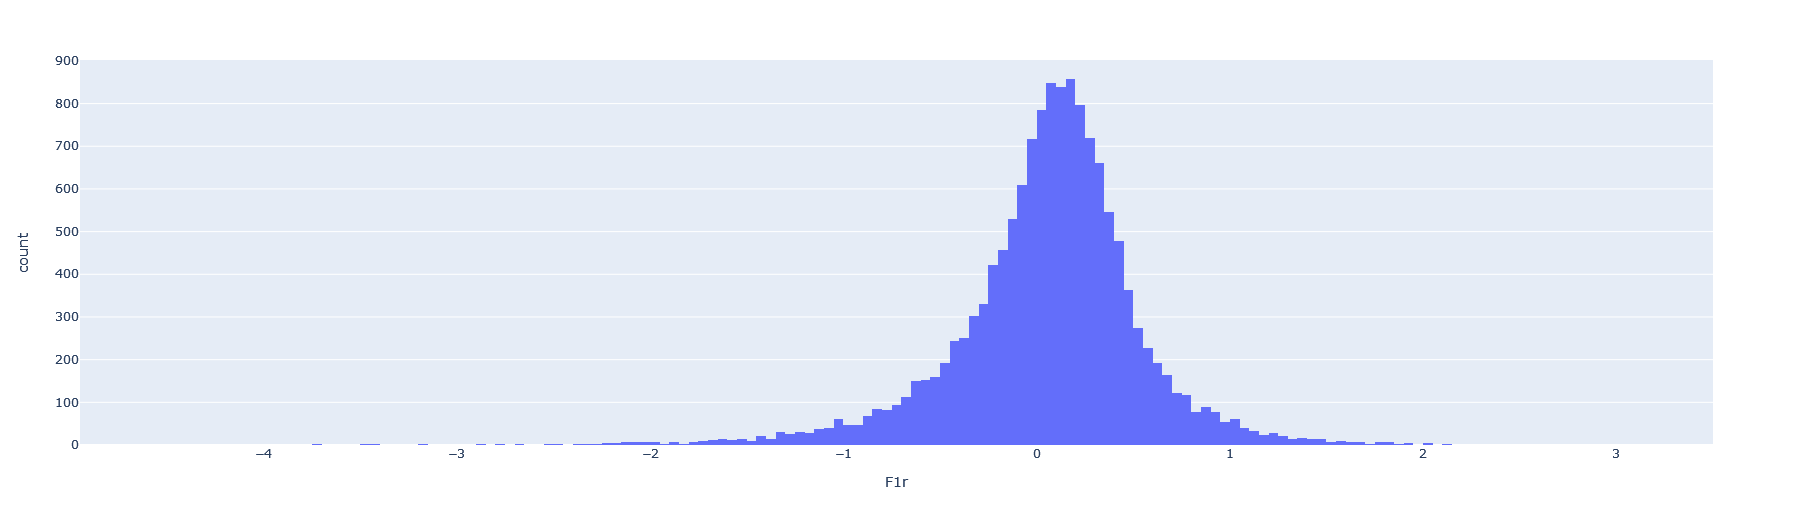

In [187]:
df_services['F1r'].describe()

count    14117.000000
mean         0.051252
std          0.509572
min         -4.915325
25%         -0.161913
50%          0.095136
75%          0.316165
max          3.496363
Name: F1r, dtype: float64

POR PARTE DE LOS RETURNS, CONTAMOS IGUALMENTE CON UNA DISTRIBUCIÓN NORMAL, CON VALORES CERCANOS AL CERO AUNQUE CON UNA DISPERSIÓN LIGERAMENTE MAYOR.

AHORA EVALUAREMOS LOS DATOS ESTADÍSTICOS GENERALES DE NUESTRAS VARIABLES EN BASE A LOS SERVICIOS.

In [188]:
df_services_stats = df_services.groupby('Sector NAICS\nlevel 1')['EPSP (deflated by price)'].mean().to_frame()
df_services_stats['EPSP median'] = df_services.groupby('Sector NAICS\nlevel 1')['EPSP (deflated by price)'].median()

df_services_stats['Sales Anual Growth mean'] = df_services.groupby('Sector NAICS\nlevel 1')['Sales Anual Growth'].mean()
df_services_stats['Sales Anual Growth median'] = df_services.groupby('Sector NAICS\nlevel 1')['Sales Anual Growth'].median()

df_services_stats['OPM mean'] = df_services.groupby('Sector NAICS\nlevel 1')['Operating Profit Margin (OPM)'].mean()
df_services_stats['OPM median'] = df_services.groupby('Sector NAICS\nlevel 1')['Operating Profit Margin (OPM)'].median()

df_services_stats['Book-to-Market ratio mean'] = df_services.groupby('Sector NAICS\nlevel 1')['Book-to-Market ratio'].mean()
df_services_stats['Book-to-Market ratio median'] = df_services.groupby('Sector NAICS\nlevel 1')['Book-to-Market ratio'].median()

df_services_stats['F1r mean'] = df_services.groupby('Sector NAICS\nlevel 1')['F1r'].mean()
df_services_stats['F1r median'] = df_services.groupby('Sector NAICS\nlevel 1')['F1r'].median()

df_services_stats.reset_index(inplace=True)
df_services_stats.head()

Sector NAICS\nlevel 1  \
0                    Accommodation and Food Services   
1  Administrative and Support and Waste Managemen...   
2                               Educational Services   
3      Other Services (except Public Administration)   
4   Professional, Scientific, and Technical Services   

   EPSP (deflated by price)  EPSP median  Sales Anual Growth mean  \
0                  0.000443     0.009453                91.806066   
1                 -0.004248     0.008367                 0.447685   
2                 -0.005168     0.009303                 0.087122   
3                 -0.026037     0.008738                 0.786426   
4                 -0.021136     0.005565                 0.538981   

   Sales Anual Growth median   OPM mean  OPM median  \
0                   0.060242  -8.210987    0.089460   
1                   0.076524  -0.419961    0.086885   
2                   0.035829   0.078473    0.091468   
3                   0.044596  -1.743516    0.085506   
4                   0.077143 -15.580967    0.059077   

   Book-to-Market ratio mean  Book-to-Market ratio median  F1r mean  \
0                   0.383355                     0.263463  0.089286   
1                   0.367660                     0.298250  0.075290   
2                   0.592553                     0.505449  0.006500   
3                   0.384085                     0.366528  0.000692   
4                   0.387568                     0.311076  0.015743   

   F1r median  
0    0.109943  
1    0.119660  
2    0.016582  
3    0.054762  
4    0.072685

COMO SE HABÍA COMENTADO EN LOS DIAGRAMAS ANTERIORES, LO MÁS RECOMENDABLE ES UTILIZAR LA MEDIANA, DE ESTA MANERA LOS OUTLIERS NO COMPROMETERÁN TANTO NUESTRO ANÁLISIS.

AHORA EN LOS SIGUIENTES HISTOGRAMAS SE MOSTRARÁN NUESTRAS VARIABLES SEGÚN EL TIPO DE SERVICIO.

In [189]:
px.histogram(df_services_stats, x = 'Sector NAICS\nlevel 1', y = 'EPSP median')

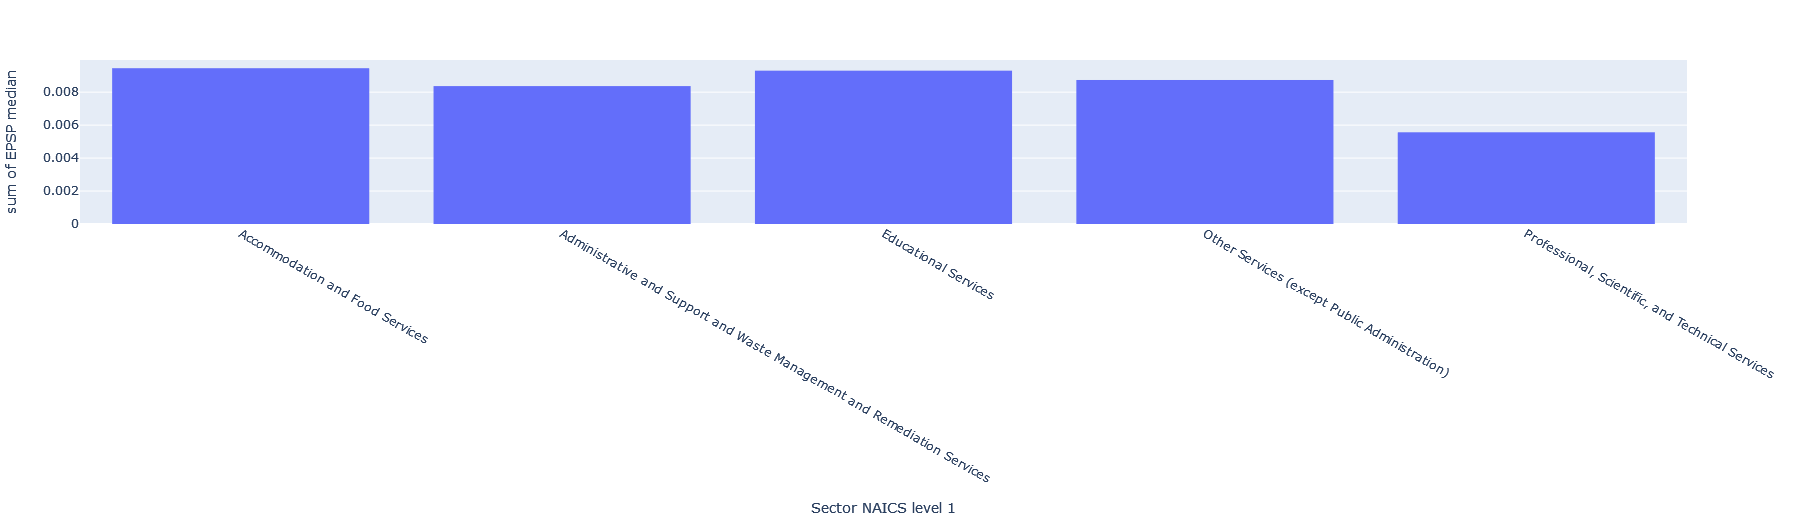

SE PUEDE VER QUE LA RENTABILIDAD DE LAS INDUSTRIAS DE SERVICIO SE ENCUENTRAN EN GENERAL ESTABLES Y CON POCAS VARIACIONES ENTRE CADA INDUSTRIA, ÚNICMANTE PROFESSIONAL, SCIENTIFIC AND TECHNICAL SERVICES ES MENOR A LAS DEMÁS.

In [190]:
px.histogram(df_services_stats, x = 'Sector NAICS\nlevel 1', y = 'Sales Anual Growth median')

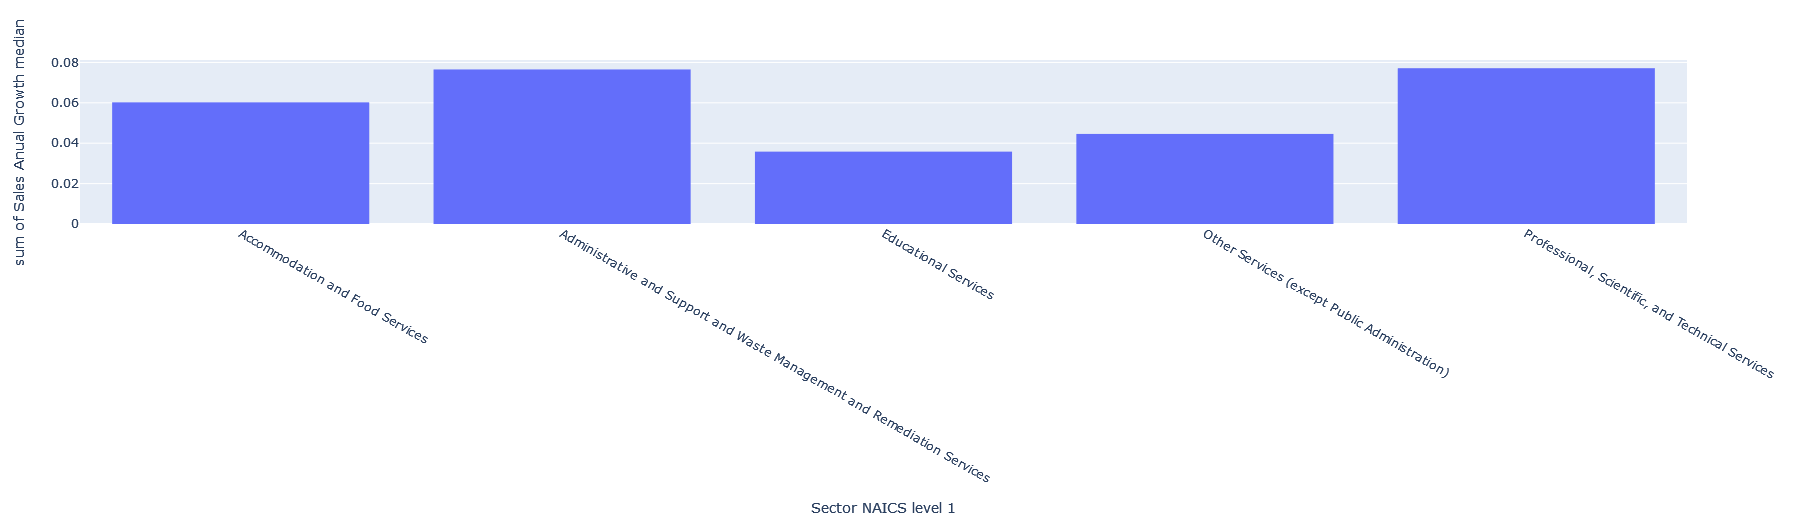

EN CUANTO AL CRECIMIENTO DE VENTAS ANUALES, DESTACA ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIATION SERVICES, AL IGUAL QUE PROFESSIONAL, SCIENTIFIC AND TECHNICAL SERVICES. CON INCREMENTOS DEL 0.07.

In [191]:
px.histogram(df_services_stats, x = 'Sector NAICS\nlevel 1', y = 'OPM median')

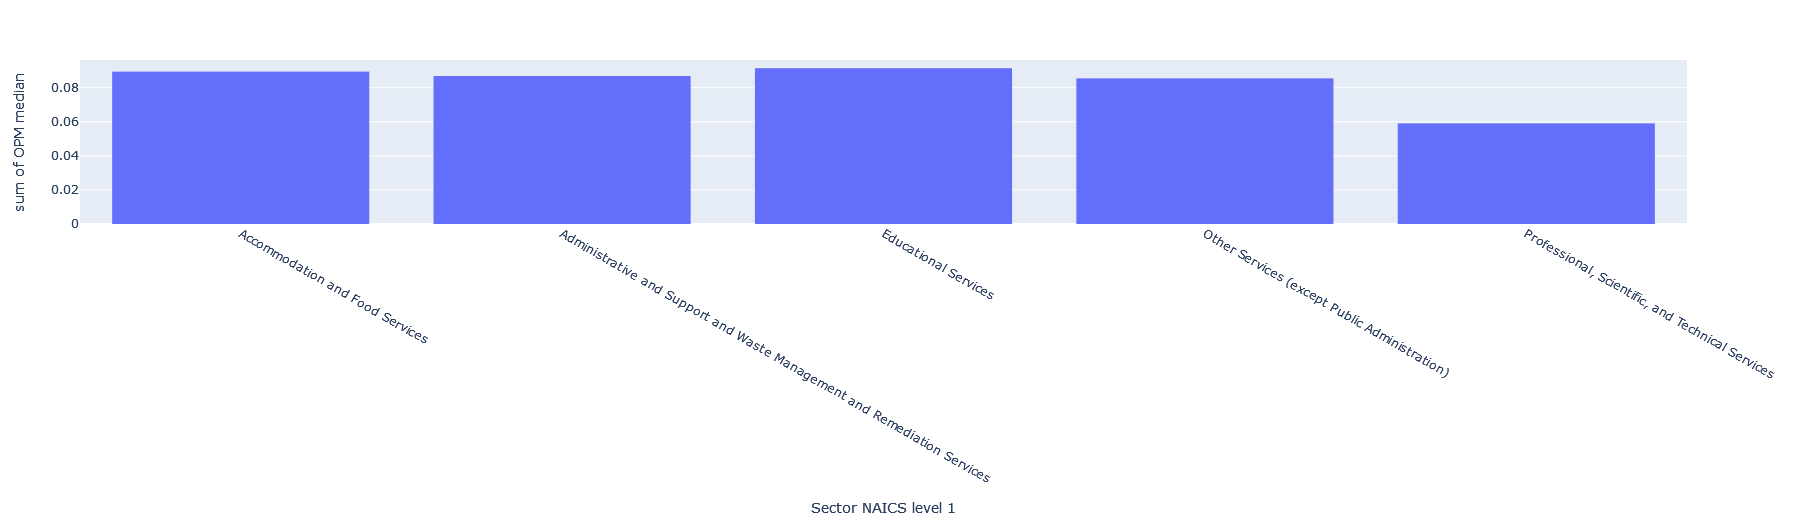

AL IGUAL QUE CON EL EPSP, LA OPM SE ENCUENTRA ESTABLE Y SIMILAR EN LOS SERVICIOS, SITUANDOSE ALREDEDOR DEL 0.09.

In [192]:
px.histogram(df_services_stats, x = 'Sector NAICS\nlevel 1', y = 'Book-to-Market ratio median')

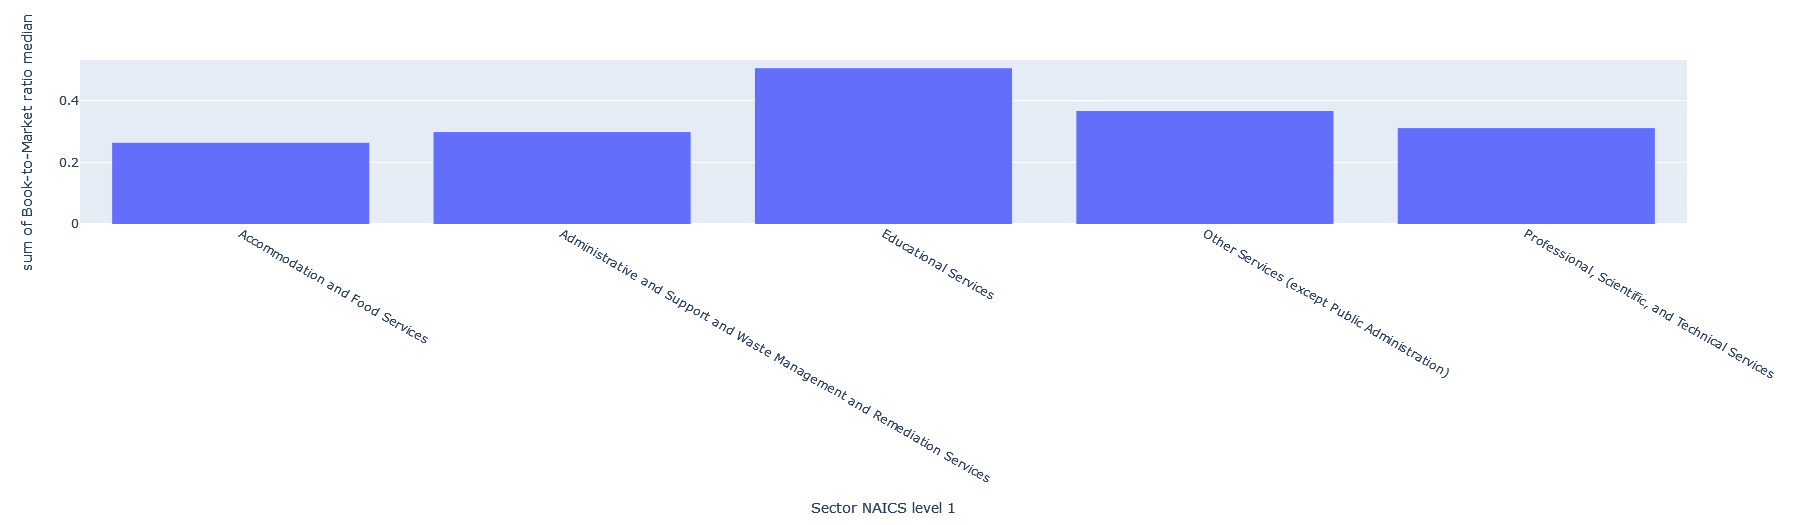

ES EN EL BOOK-TO-MARKET RATIO DONDE HAY MÁS VARIACIÓN EN LOS DATOS, SIENDO EDUCATIONAL SERVICES EL DE MÁS ALTO RATIO, LO CUAL LO HACE VER COMO UN SECTOR PROMETEDOR.

In [193]:
px.histogram(df_services_stats, x = 'Sector NAICS\nlevel 1', y = 'F1r median')

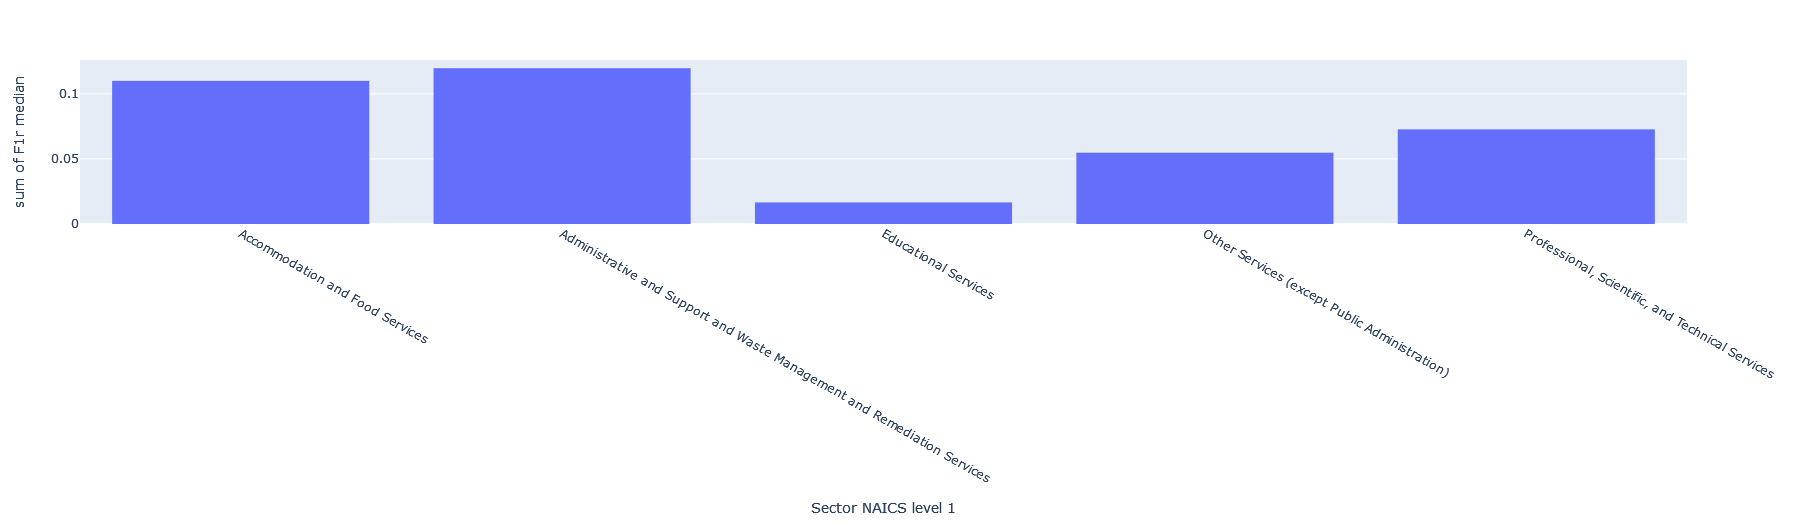

EN CUANTO A LOS RETURNS TENEMOS UN ALTO ÍNDICE CON ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIATION SERVICES, ASÍ COMO EN ACCOMODATION AND FOOD SERVICES.

## Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model

* Your independent variables must be in the right scale so that you can compare the values of the variables among different firms of any size

* For each independent variable you have to check for outliers and do the corresponding adjustments to avoid unreliable results in your regression model

* You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test

In [194]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [195]:
df_services.columns

Index(['q', 'revenue', 'cogs', 'sgae', 'otheropexp', 'extraincome', 'finexp',
       'incometax', 'totalassets', 'totalliabilities', 'shortdebt', 'longdebt',
       'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding',
       'Ticker', 'Name', 'Class', 'Sector NAICS\nlevel 1', 'Exchange / Src',
       'Sector\nEconomatica', 'Sector NAICS\nlast available', 'partind',
       'lprice', 'r', 'r2', 'Book', 'Market', 'EBIT', 'Net Income',
       'Earnings Per Share (EPS)', 'EPSP (deflated by price)',
       'Sales Anual Growth', 'Operating Profit Margin (OPM)',
       'Book-to-Market ratio', 'pct', 'isSmall', 'isMedium', 'F1r'],
      dtype='object')

In [197]:
df_model = df_services[['EPSP (deflated by price)', 'Sales Anual Growth', 'Operating Profit Margin (OPM)', 'Book-to-Market ratio', 'isSmall', 'isMedium', 'F1r']]

In [199]:
from scipy.stats.mstats import winsorize
df_model["EPSP (deflated by price)"] = winsorize(df_model["EPSP (deflated by price)"], limits=[0.0001, 0.02])
df_model["Sales Anual Growth"] = winsorize(df_model["Sales Anual Growth"], limits=[0.01, 0.0002])
df_model["Operating Profit Margin (OPM)"] = winsorize(df_model["Operating Profit Margin (OPM)"], limits=[0.0001, 0.02])
df_model["Book-to-Market ratio"] = winsorize(df_model["Book-to-Market ratio"], limits=[0.0001, 0.02])
df_model["F1r"] = winsorize(df_model["F1r"], limits=[0.0001, 0.02])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [200]:
px.histogram(df_model, x = 'EPSP (deflated by price)')

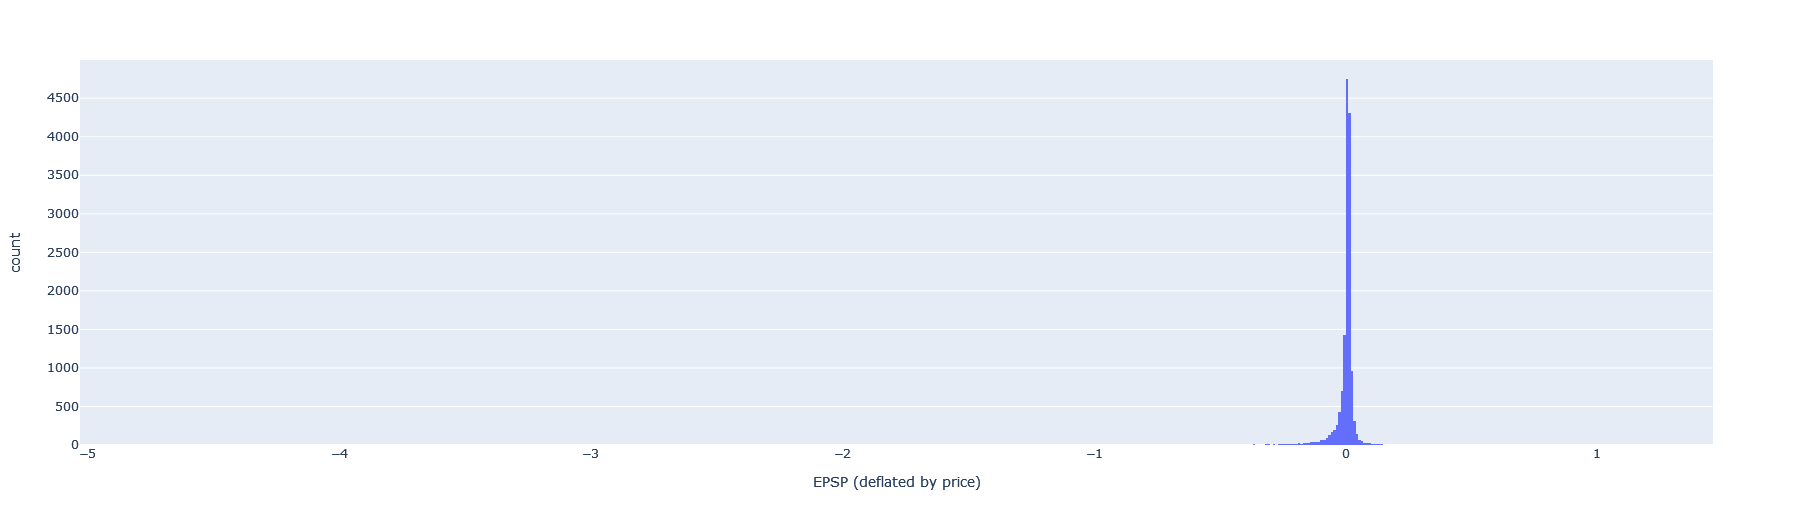

In [201]:
px.histogram(df_model, x = 'Sales Anual Growth')

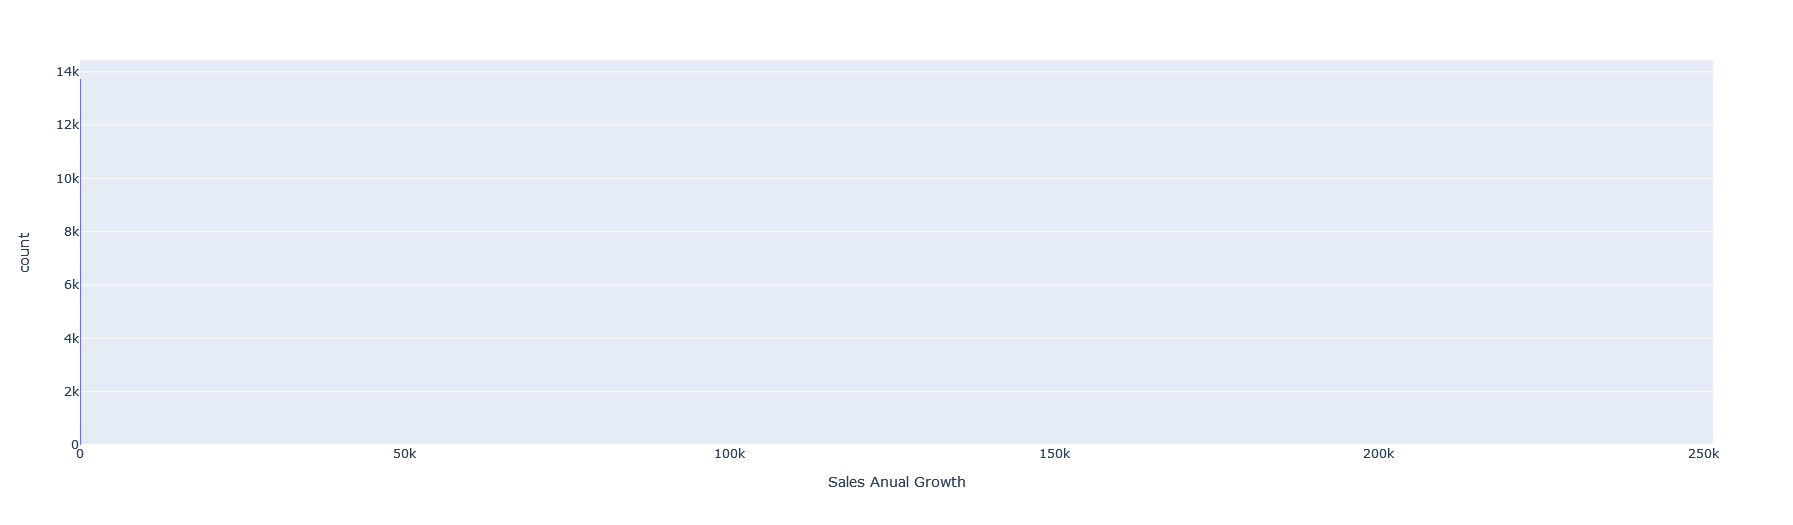

In [202]:
px.histogram(df_model, x = 'Operating Profit Margin (OPM)')

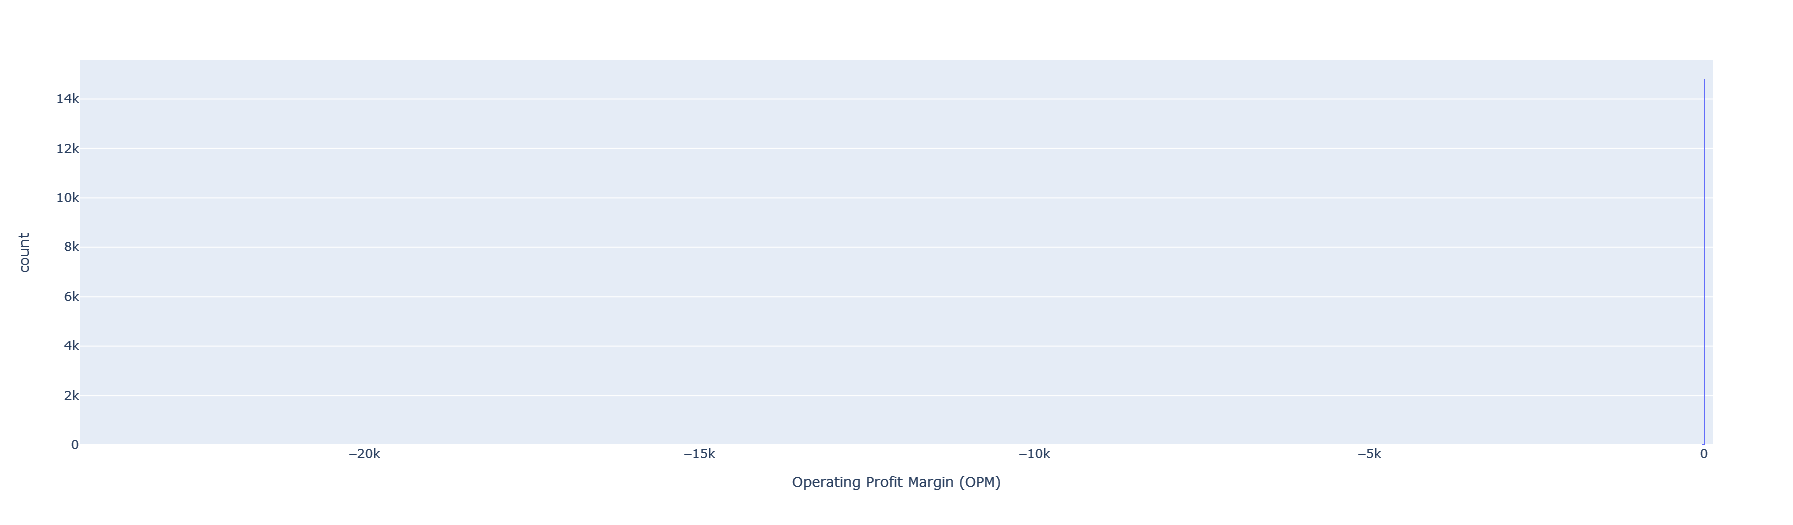

In [203]:
px.histogram(df_model, x = 'Book-to-Market ratio')

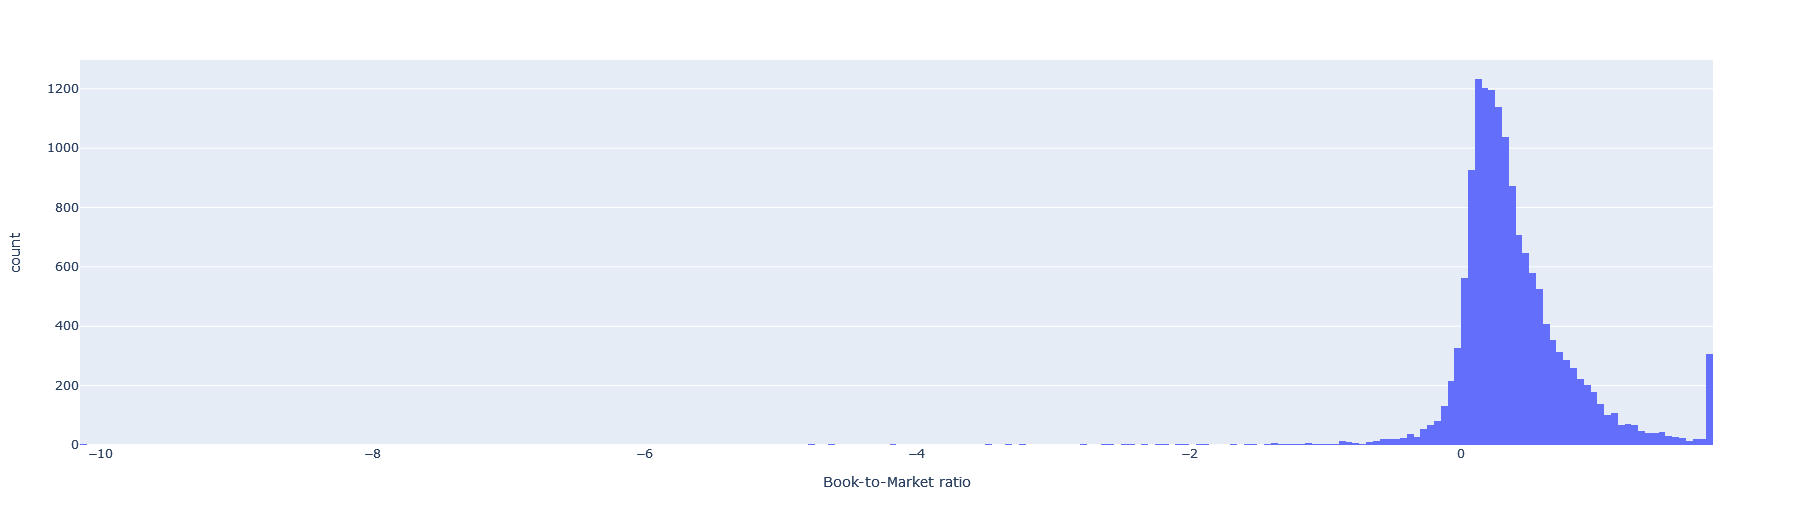

In [204]:
px.histogram(df_model, x = 'F1r')

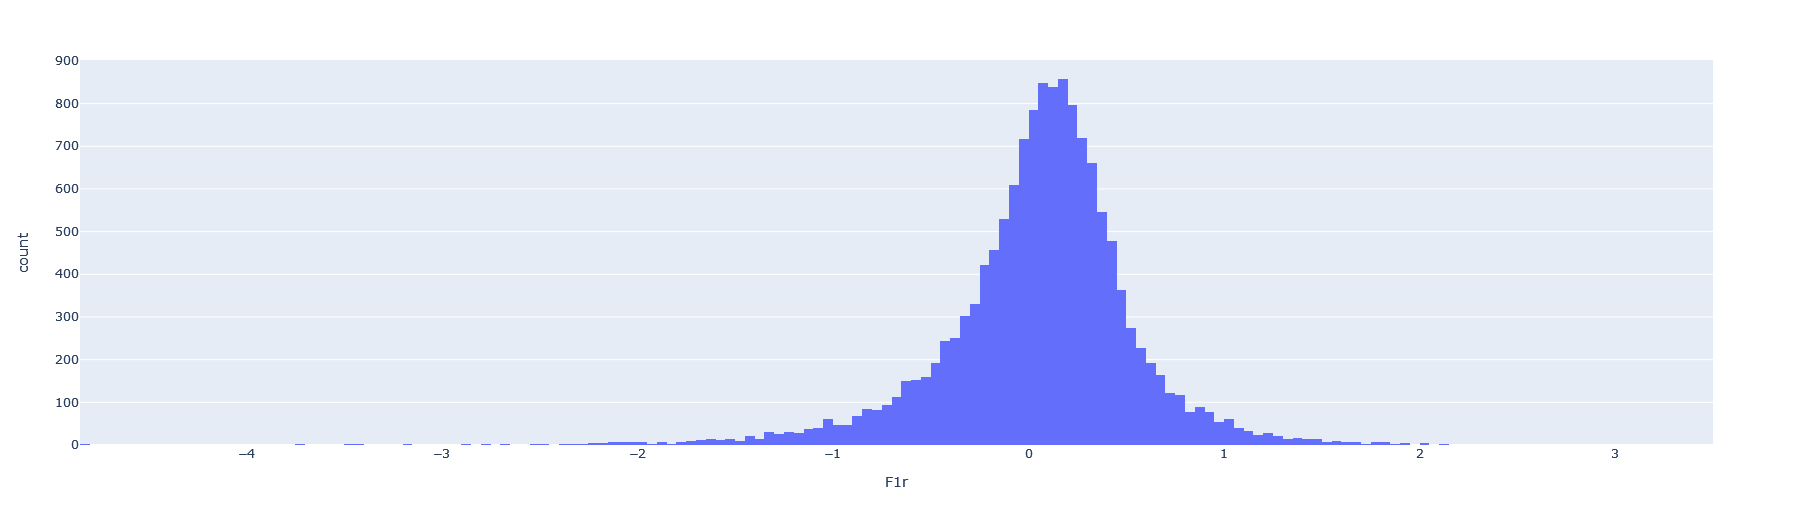

SE REALIZÓ UNA WINSORIZACIÓN PARA AJUSTAR LOS OUTLIERS SUPERIORES E INFERIORES.

SE PUEDEN VER LIGEROS CAMBIOS EN LA DISTRIBUCIÓN DE LOSD DATOS, TENIENDO AHORA UNA FORMA MÁS NORMALIZADA, POR LO QUE LA WINSORIZACIÓN FUE ADECUADA, NO ES RECOMENDABLE HACERLO DE MANERA EXAGERADA PARA EVITAR LA PÉRDIDA DE INFORMACIÓN.

In [205]:
df_model.rename(columns = {'EPSP (deflated by price)':'EPSP', 'Sales Anual Growth':'SAG', 'Operating Profit Margin (OPM)':'OPM', 'Book-to-Market ratio':'BtMr'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [206]:
df_model

EPSP       SAG        OPM      BtMr  isSmall  isMedium  \
firm qdate                                                                
ABM  2011Q3  0.027465       NaN   0.037847  0.772611        0         1   
     2011Q4  0.016405       NaN   0.030906  0.723434        0         1   
     2012Q1  0.008141       NaN   0.016573  0.616663        0         1   
     2012Q2  0.011073       NaN   0.017842  0.773232        0         1   
     2012Q3  0.012252  0.002776   0.021472  0.804143        0         1   
...               ...       ...        ...       ...      ...       ...   
ZY   2021Q2 -0.025120       NaN -16.588925  0.141840        0         1   
     2021Q3 -0.072845       NaN -23.333170  0.353597        0         1   
     2021Q4 -0.114060       NaN -23.444883  0.596277        0         1   
     2022Q1 -0.241984  0.282731 -13.278230  1.154503        1         0   
     2022Q2 -0.918060 -0.552573 -40.317388  1.804688        1         0   

                  F1r  
firm qdate             
ABM  2011Q3       NaN  
     2011Q4 -0.017501  
     2012Q1 -0.149806  
     2012Q2  0.021520  
     2012Q3  0.002499  
...               ...  
ZY   2021Q2       NaN  
     2021Q3       NaN  
     2021Q4       NaN  
     2022Q1 -3.482115  
     2022Q2       NaN  

[15236 rows x 7 columns]

SE RENOMBRARON LAS COLUMNAS PARA QUE SEA ACEPTADA SU SINTAXIS.

In [209]:
model = df_model.copy()
model = model.dropna()

In [211]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = model.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(model.values, i)
                          for i in range(len(model.columns))]

print(vif_data)

    feature       VIF
0      EPSP  1.116948
1       SAG  1.000248
2       OPM  1.001135
3      BtMr  1.513073
4   isSmall  1.396486
5  isMedium  1.154245
6       F1r  1.100728


EL VIF ES MENOR A 1.5, POR LO QUE PODEMOS DECIR QUE NO HAY MULTICOLINEARIDAD EN LOS DATOS DE LAS VARIABLES.

In [212]:
mod = smf.ols('F1r ~ EPSP + SAG + OPM + BtMr + isSmall + isMedium', data = df_model).fit()

print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                    F1r   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     262.3
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          2.35e-318
Time:                        10:06:37   Log-Likelihood:                -9005.8
No. Observations:               13289   AIC:                         1.803e+04
Df Residuals:                   13282   BIC:                         1.808e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1487      0.007     19.972      0.0

## Interpret your model

* Interpret the results of each coefficient (beta and their statistical significance)

* Interpret the R-squared of the model

TENIENDO COMO VARIABLE DEPENDENDIENTE NUESTRA F1r SABEMOS QUE:

* EL EPSP CUENTA CON UNA RELACIÓN POSITIVA DE 1.0249, ESTO QUIERE DECIR QUE POR CADA INCREMENTO EN UNA UNIDAD AL EPSP, LA R AUMENTA EN 1.0249. ESTA VARIABLE ES SIGNIFICATIVA, PUES CUENTA CON UN T VALUE DE 34.432, POR LO QUE NOS DA UN 99.99% DE FIDELIDAD.

* CON SALES ANUAL GROWTH HAY UNA RELACIÓN NEGATIVA, DONDE POR CADA CAMBIO EN UNA UNIDAD, EL RETORNO DE STOCK DISMINUTE EN 1.082E-5, UN INCREMENTO BASTANTE PEQUEÑO, ADEMÁS DE POCO SIGNIFICATIVO, SU T VALUE ES DE -0.571, ENTONCES TIENE UNA FIDELIDAD MUY BAJA.

* EL OPM TIENE IGUALMENTE UNA RELACIÓN NEGATIVA, CON UN INCREMENTO EN F1r DE A PENAS -1.738E-5 POR CADA UNIDAD EN OPM, SIN EMBARGO, DADO SU T VALUE DE -0.938, ESTA VARIABLE TIENE UNA FIDELIDAD DEL 65%.

* HABLANDO DEL BOOK TO MARKET RATIO, ESTA TIENE UNA RELACIÓN NEGATIVA, DONDE POR CADA CAMBIO EN UNA UNIDAD, EL F1r SE VERÁ DISMINUIDO EN 0.0886. ES UNA VARIABLE SIGNIFICATIVA EN UN 99.99% DADO SU T VALUE.

* AHORA EN CUANTO AL TAMAÑO DE LAS EMPRESAS SABEMOS QUE:

  * LAS EMPRESAS GRANDES TENDRÁN MAYORES RETORNOS DADO QUE INICIAN CON UN 0.1487, DADA LA INSTERSECCIÓN.
  * LAS MEDIANAS INICIARÁN EN 0.1021 (0.1487 - 0.0466)
  * LAS CHICAS INICIARÁN EN 0.0478 (0.1487 - 0.1009)
  * ESTAS VARIABLES SON SIGNIFICTIVAS POR SUS ALTOS VALORES DE T VALUE, TENIENDO 99.99% DE FIDELIDAD.

* EN GENERAL NUESTRO MODELO SOLO TIENE UNA PRECISIÓN DEL 10.6%, EXPRESADO POR NUESTRA R CUADRADA, ESTO TAMBIÉN SE DEBE A QUE QUEREMOS PREDECIR LOS RETORNOS ANUALES, Y EL MERCADO CUENTA CON LA FACILIDAD DE ADAPTARSE A LOS CAMBIOS, POR LO QUE UNA PREDICCIÓN MÁS SIGNIFICATIVA REQUIERE QUE LA PREDICCIÓN SEA A UN INTÉRVALO DE TIEMPO MENOR.

ISBIG

* R = 0.1487 + 1.0249(EPSP) - 1.738e-05(OPM) - 0.0886(BOOK-TO-MARKET RATIO)

ISMEDIUM

* R = 0.1021 + 1.0249(EPSP) - 1.738e-05(OPM) - 0.0886(BOOK-TO-MARKET RATIO)

ISSMALL

* R = 0.0478 + 1.0249(EPSP) - 1.738e-05(OPM) - 0.0886(BOOK-TO-MARKET RATIO)